In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
ROADS_1 = ['A. Maceda', 'Anda Circle', 'Antipolo',
         'Bluementritt', 'Buendia', 'Edsa Extension', 'Finance Road', 
         'Gov. Forbes - Lacson', 'Lerma', 'Magsaysay Ave', 'P.Noval', 'Pablo Ocampo', 'Pedro Gil', 
         'Quezon Ave.', 'Quirino', 'Rajah Sulayman', 'Taft Ave.', 'U.N. Avenue',
         'Vicente Cruz']

YEAR = "2015"
EXT = ".csv"

DATASET_DIR = "../../../../datasets/analysis/"
DATASET_DIVISION = "seasonWet"

In [3]:
def getAllHighCorr(dataset, limit):
    features = dataset.columns
    hc_features = []
    for w in range(0, len(features)):
        #print('Highly correlated with ' + w)
        col_name = features[w]
        col = dataset[col_name]
        temp = col[((col <= -limit) | (col >= limit))]
        hc_features.append(temp)
        #print(col[col>=0.5])
        #print('\n')
        
        
    for w in range(1, len(features)-1):
        hc_features[w] = hc_features[w].to_frame()
        print(hc_features[w])
        print('\n')
        
    return hc_features

# Non-Rolling

In [4]:
CORR_NR = []
for r in range(len(ROADS_1)):
    df = pd.read_csv(DATASET_DIR + "/" + DATASET_DIVISION + "/" 
                     + ROADS_1[r] + "_" + YEAR + "_" + DATASET_DIVISION + EXT,
                     skipinitialspace=True)
    df = df.rename(columns={df.columns[0]:"Features"})
    CORR_NR.append(df)

In [5]:
CORR_NR[0].head()

,Features,statusN,statusS,tempC,windspeedMiles,precipMM,humidity,visibility,pressure,cloudcover,heatIndexC,dewPointC,windChillC,windGustMiles,feelsLikeC
0,statusN,1.000000,0.260052,-0.292856,-0.068545,-0.033716,0.266652,0.003019,-0.082040,0.013182,-0.284493,-0.157385,-0.292732,-0.030725,-0.284493
1,statusS,0.260052,1.000000,-0.163938,-0.077942,-0.062702,0.130592,0.074760,0.048893,0.020959,-0.136842,-0.029857,-0.163773,-0.077652,-0.136842
2,tempC,-0.292856,-0.163938,1.000000,0.059063,-0.083269,-0.914234,0.079510,0.004756,-0.206256,0.973317,0.344566,0.999903,-0.085492,0.973317
3,windspeedMiles,-0.068545,-0.077942,0.059063,1.000000,0.424447,-0.021761,-0.341171,-0.483427,0.356545,0.048003,-0.025478,0.059898,0.961223,0.048003
4,precipMM,-0.033716,-0.062702,-0.083269,0.424447,1.000000,0.250007,-0.775885,-0.370382,0.573512,-0.018977,0.316335,-0.082716,0.507469,-0.018977


In [6]:
ROADS_SB_C = []
ROADS_NB_C = []

for r in range(len(ROADS_1)):
    #Analyzing Weather to Traffic 
    feature = 0 #NorthBound
    df = CORR_NR[r].loc[[feature]]  
    ROADS_NB_C.append(df)    
    
    feature = 1 #SouthBound
    df = CORR_NR[r].loc[[feature]]  
    ROADS_SB_C.append(df)    

<br><br><br>
## NON-ROLLING - SOUTHBOUND

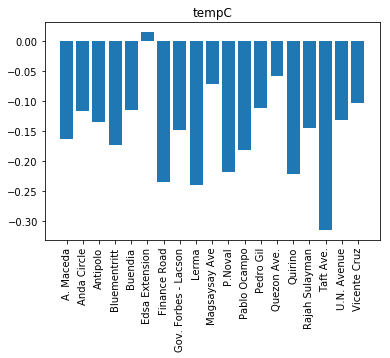

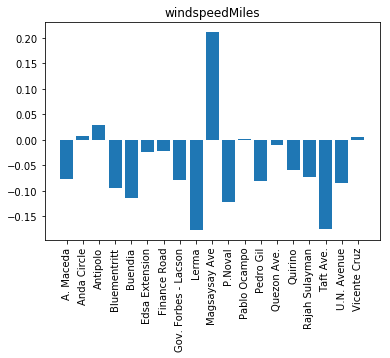

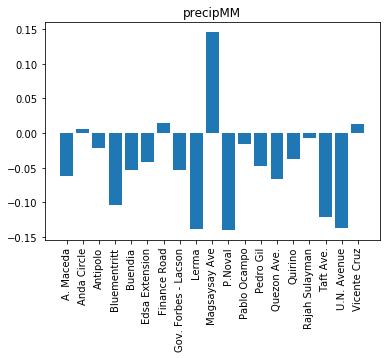

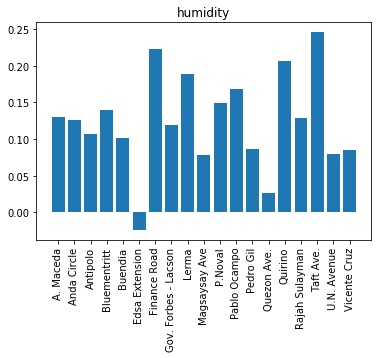

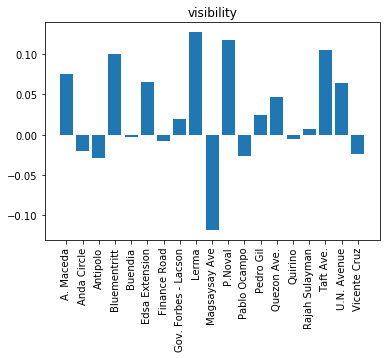

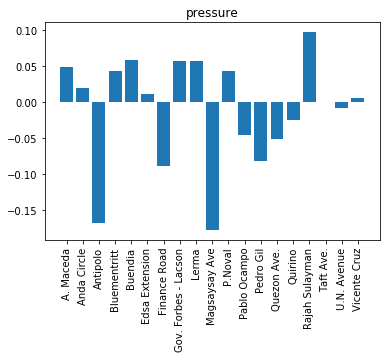

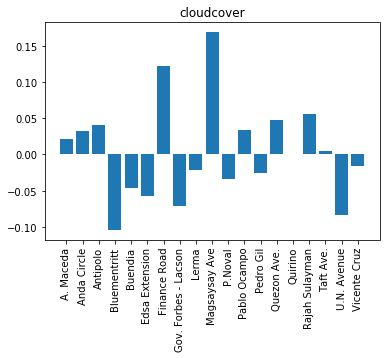

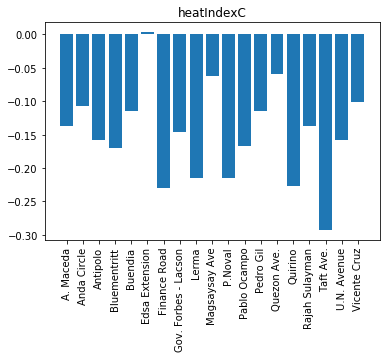

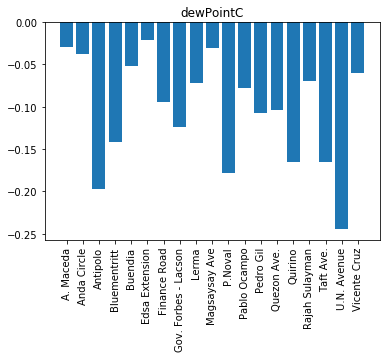

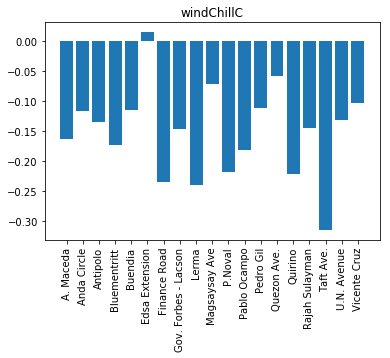

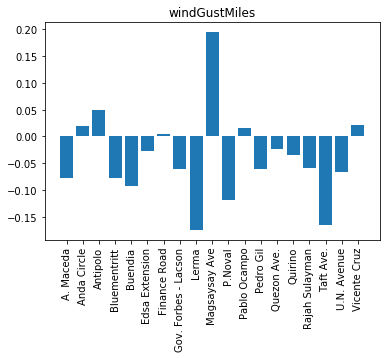

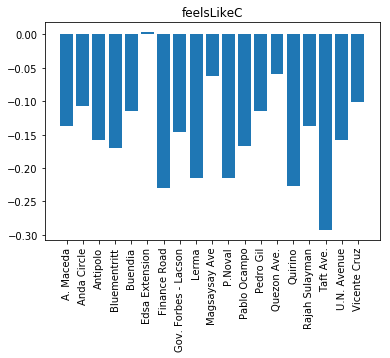

In [7]:
y = []
FEATURES = ROADS_SB_C[0].columns
for f in range(3, len(ROADS_SB_C[0].columns)): 
    y = []
    for r in ROADS_SB_C:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.title(ROADS_SB_C[0].columns[f])
    plt.xticks(rotation='vertical')
    plt.show()


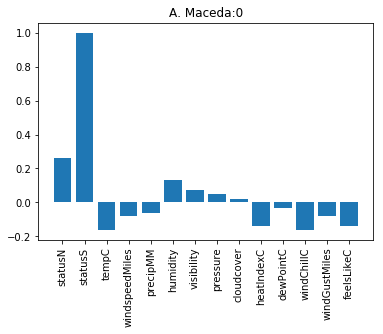

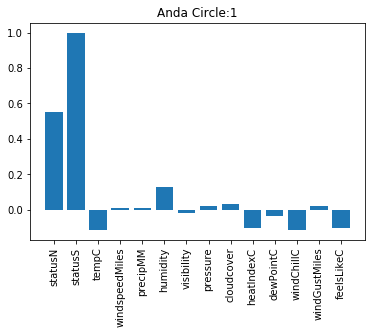

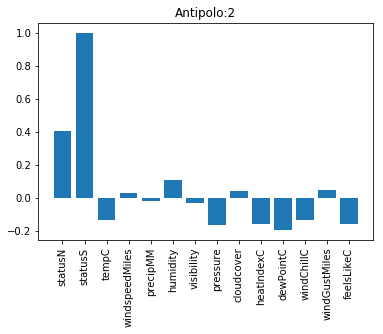

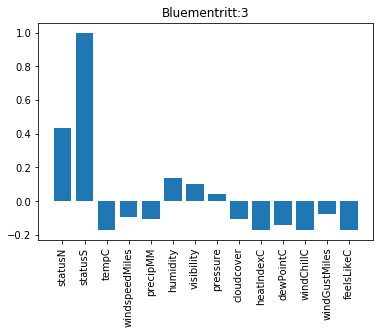

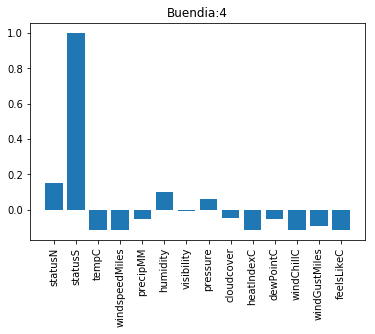

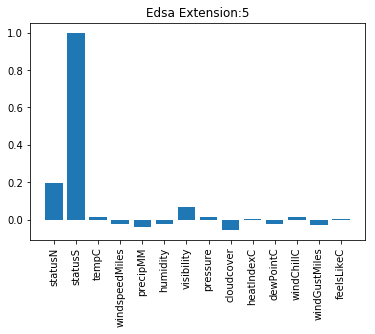

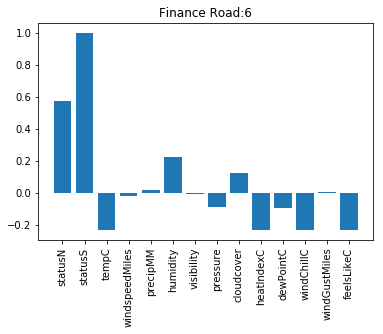

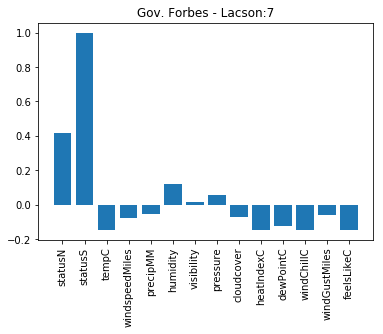

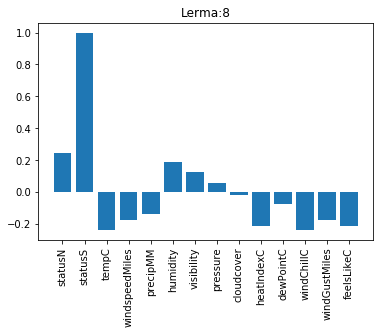

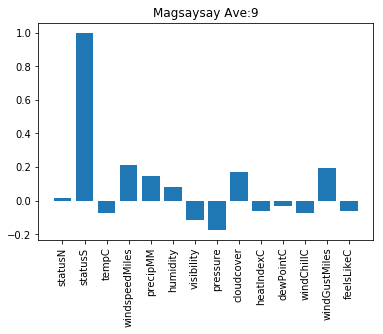

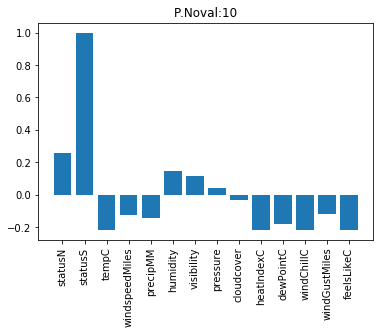

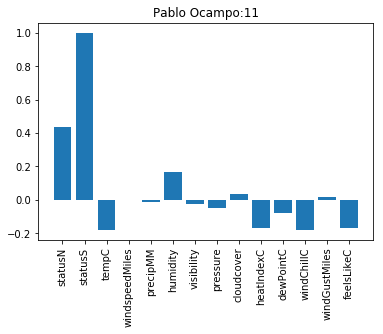

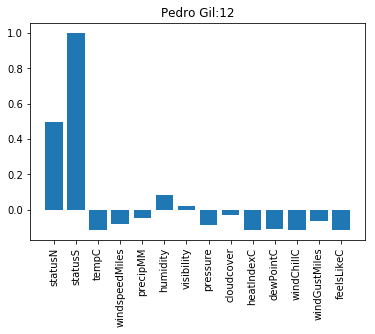

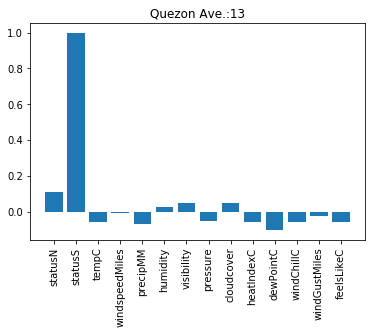

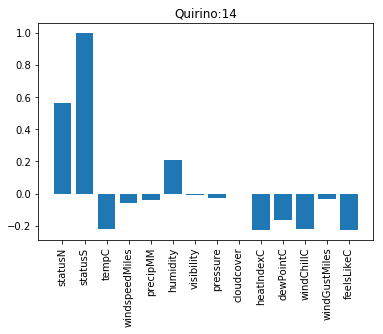

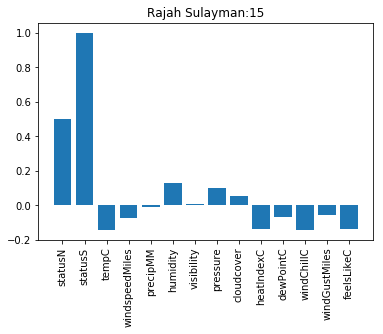

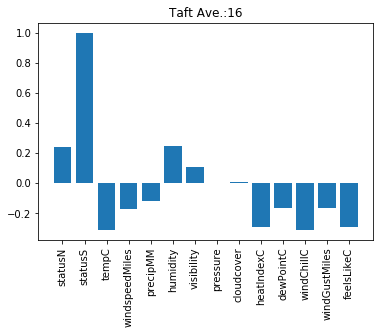

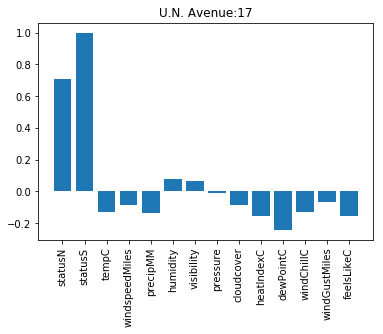

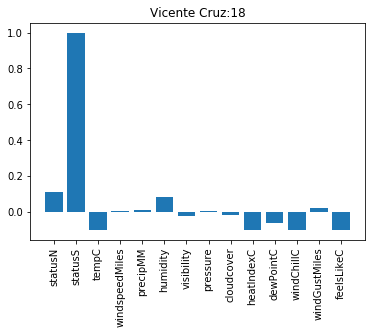

In [8]:
# for W=1
for r in range(len(ROADS_1)): 
    y = []
    for f in range(1, len(ROADS_SB_C[r].columns)):
        y.append(ROADS_SB_C[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_1[r] + ":" + str(r))

    plt.show()

<br><br><br>
## NON-ROLLING - NORTHBOUND

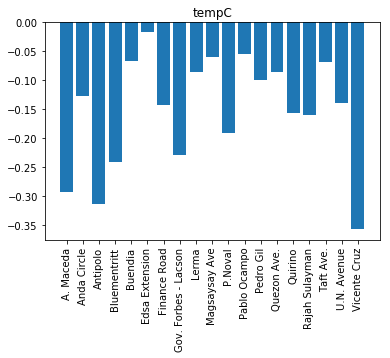

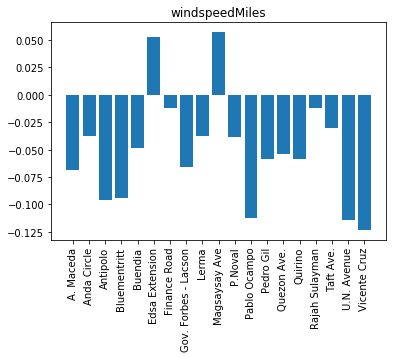

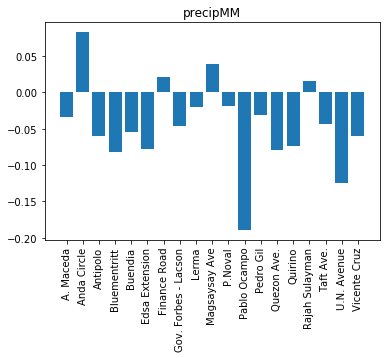

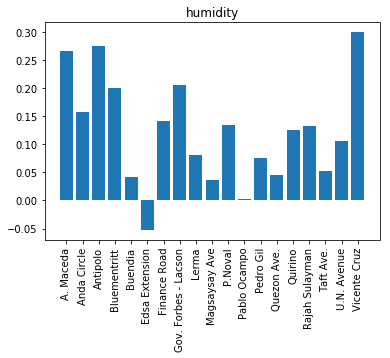

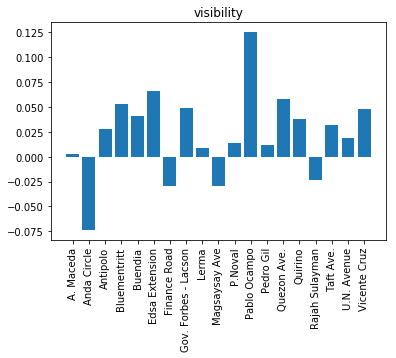

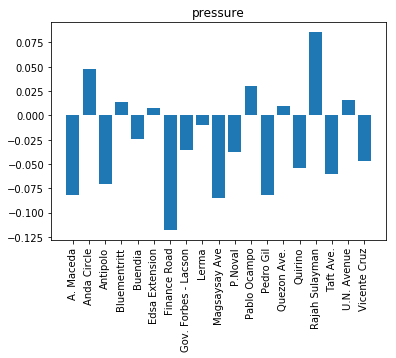

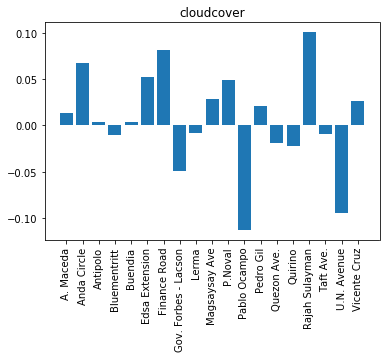

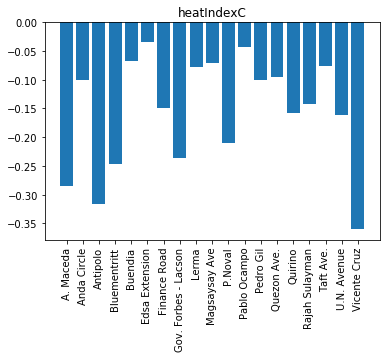

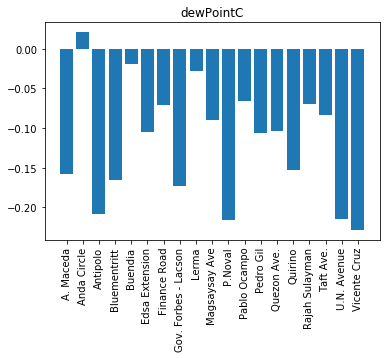

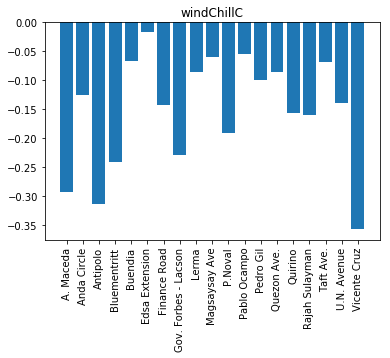

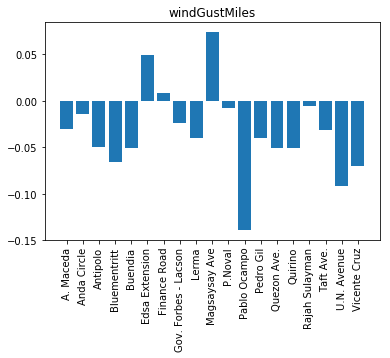

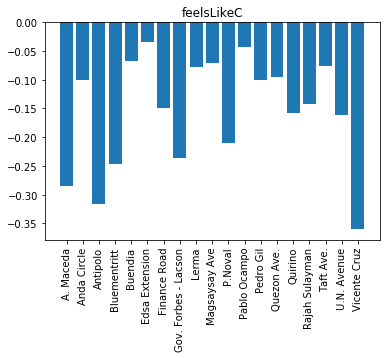

In [9]:
y = []
FEATURES = ROADS_NB_C[0].columns
for f in range(3, len(ROADS_NB_C[0].columns)): 
    y = []
    for r in ROADS_NB_C:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.title(ROADS_NB_C[0].columns[f])
    plt.xticks(rotation='vertical')
    plt.show()


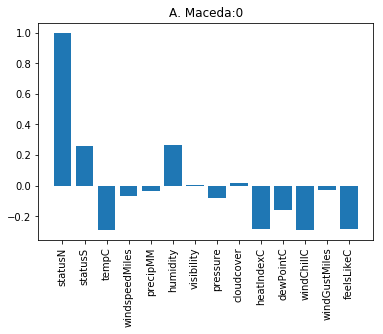

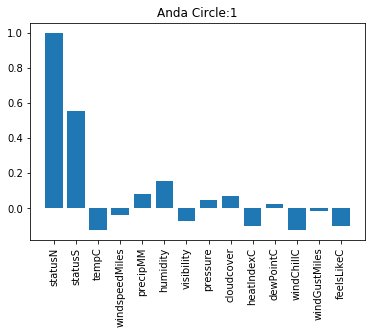

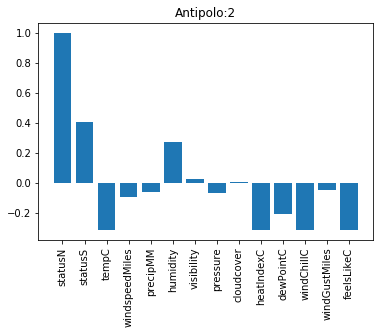

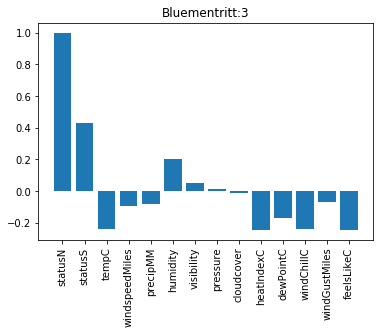

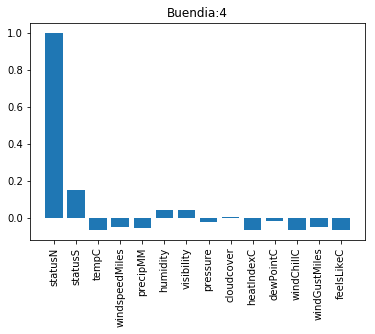

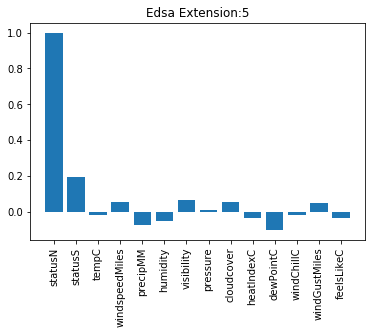

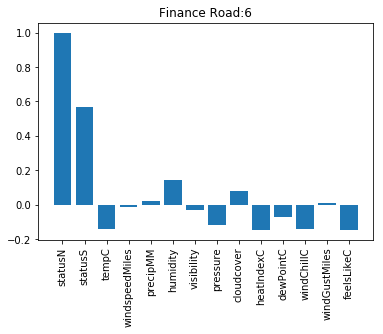

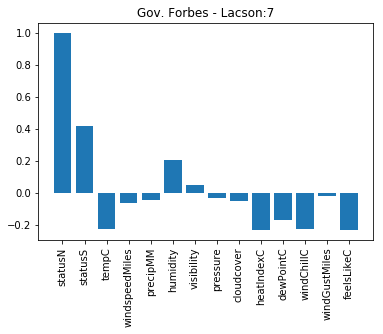

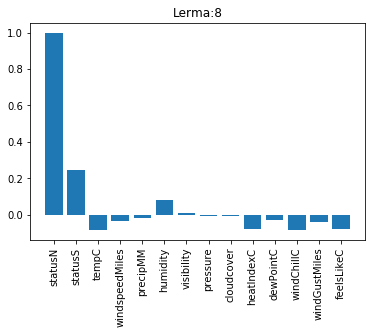

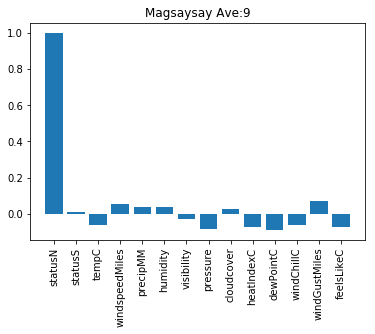

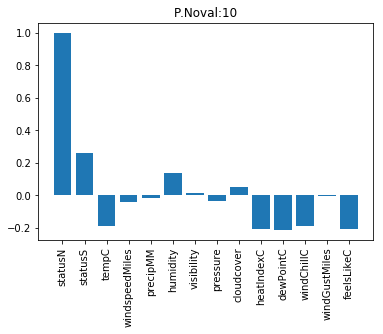

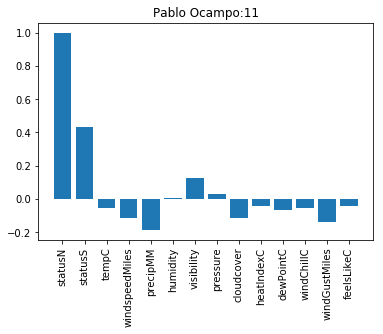

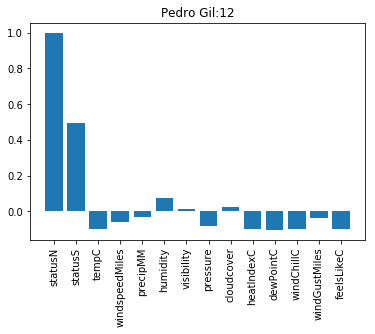

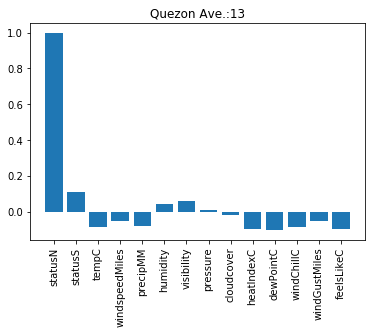

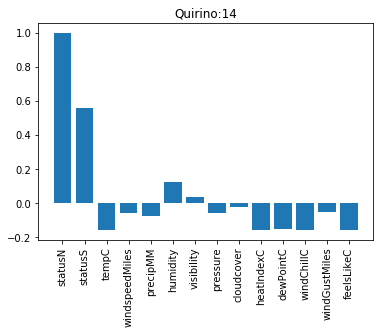

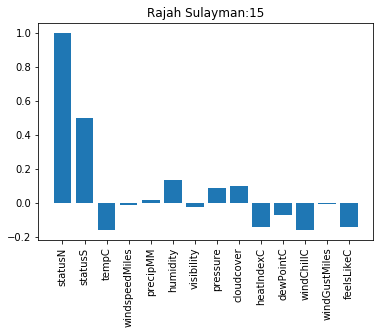

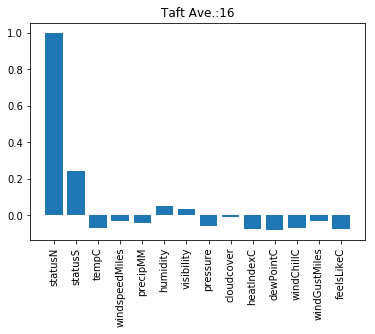

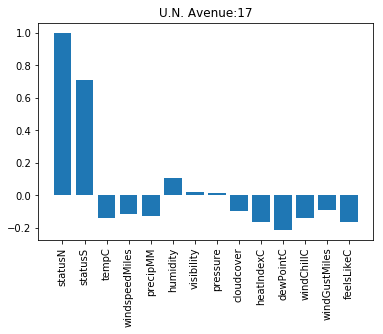

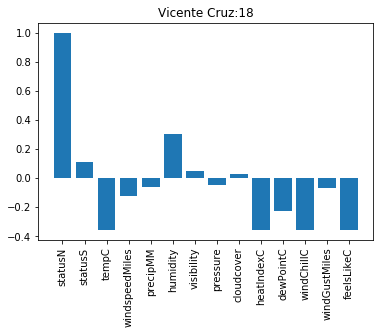

In [10]:
# for W=1
for r in range(len(ROADS_1)): 
    y = []
    for f in range(1, len(ROADS_NB_C[r].columns)):
        y.append(ROADS_NB_C[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_1[r] + ":" + str(r))

    plt.show()

<br><br><br>
# Rolling

In [11]:
CORR_R = []
for r in range(len(ROADS_1)):
    df = pd.read_csv(DATASET_DIR + "rolling_" + DATASET_DIVISION + "/" 
                     "rolling-" + DATASET_DIVISION + "_" + ROADS_1[r] + "_" + YEAR + "_" + DATASET_DIVISION + EXT,
                     skipinitialspace=True)

    df = df.rename(columns={df.columns[0]:"Features"})
    CORR_R.append(df)

In [12]:
CORR_R[0].head()

,Features,statusN,statusS,statusN_Rmean=2,statusS_Rmean=2,statusN_Rmin=2,statusS_Rmin=2,statusN_Rmax=2,statusS_Rmax=2,statusN_Rmean=3,...,precipMM_Rmax=96,humidity_Rmax=96,visibility_Rmax=96,pressure_Rmax=96,cloudcover_Rmax=96,heatIndexC_Rmax=96,dewPointC_Rmax=96,windChillC_Rmax=96,windGustMiles_Rmax=96,feelsLikeC_Rmax=96
0,statusN,1.000000,0.260052,0.987968,0.253089,0.983614,0.247516,0.983668,0.260564,0.964943,...,0.075034,0.036424,-0.066056,-0.123778,0.032845,-0.003539,0.034198,0.011679,0.087781,-0.003539
1,statusS,0.260052,1.000000,0.265637,0.988810,0.267614,0.984066,0.262986,0.984332,0.273280,...,0.042878,0.158766,-0.001205,0.035730,0.047434,-0.068923,0.078501,-0.124264,0.022909,-0.068923
2,statusN_Rmean=2,0.987968,0.265637,1.000000,0.259456,0.991192,0.253833,0.988682,0.266943,0.988282,...,0.076350,0.036024,-0.065734,-0.125268,0.033438,-0.003784,0.034854,0.011629,0.088516,-0.003784
3,statusS_Rmean=2,0.253089,0.988810,0.259456,1.000000,0.261638,0.989863,0.256611,0.988406,0.267767,...,0.043522,0.158869,-0.000565,0.035301,0.047996,-0.068959,0.079397,-0.124185,0.023897,-0.068959
4,statusN_Rmin=2,0.983614,0.267614,0.991192,0.261638,1.000000,0.256606,0.970573,0.268318,0.983880,...,0.083215,0.036836,-0.071310,-0.130231,0.038644,-0.006403,0.037236,0.009227,0.095134,-0.006403


In [13]:
WINDOWS = [2,3,4,8,12,24,32,48,96]
FEATURES = CORR_NR[0].columns

In [14]:
ROADS_SB_CR = []
ROADS_NB_CR = []

for r in range(len(ROADS_1)):
    #Analyzing Weather to Traffic 
    feature = 0 #NorthBound
    df = CORR_R[r].loc[[feature]]  
    ROADS_NB_CR.append(df)    
    
    feature = 1 #SouthBound
    df = CORR_R[r].loc[[feature]]  
    ROADS_SB_CR.append(df)    

<br>
## ROLLING - SOUTHBOUND

In [15]:
rMean = []
for w in WINDOWS:
    rMeanColumns = []
    window = w
    #Figuring out what columns are rolling mean
    for c in range(len(CORR_R[0].columns)):
        col = ROADS_SB_CR[0].columns[c]
        for f in FEATURES:
            if((f+"_Rmean=" + str(window)) == col):
                rMeanColumns.append(c)
    rMean.append(rMeanColumns)

In [16]:
ROADS_SB_CR[0]

,Features,statusN,statusS,statusN_Rmean=2,statusS_Rmean=2,statusN_Rmin=2,statusS_Rmin=2,statusN_Rmax=2,statusS_Rmax=2,statusN_Rmean=3,...,precipMM_Rmax=96,humidity_Rmax=96,visibility_Rmax=96,pressure_Rmax=96,cloudcover_Rmax=96,heatIndexC_Rmax=96,dewPointC_Rmax=96,windChillC_Rmax=96,windGustMiles_Rmax=96,feelsLikeC_Rmax=96
1,statusS,0.260052,1.0,0.265637,0.98881,0.267614,0.984066,0.262986,0.984332,0.27328,...,0.042878,0.158766,-0.001205,0.03573,0.047434,-0.068923,0.078501,-0.124264,0.022909,-0.068923


#### One Graph = All Features of Window w of Road r

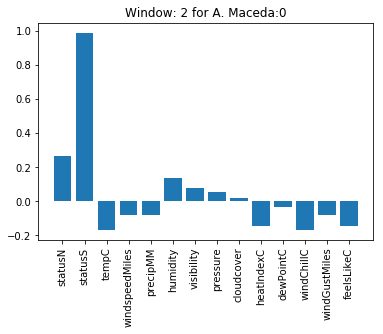

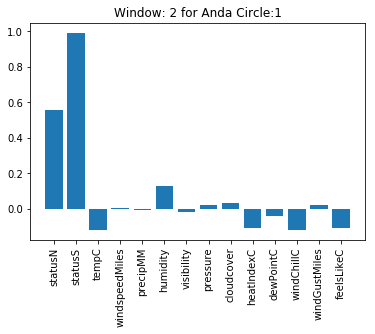

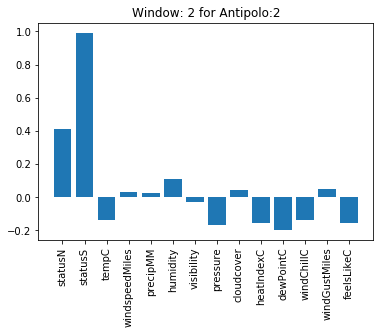

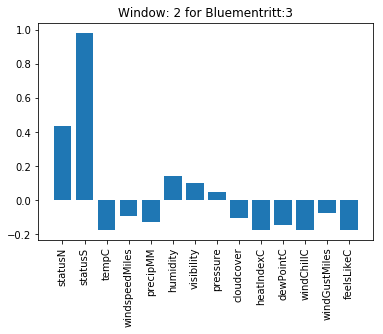

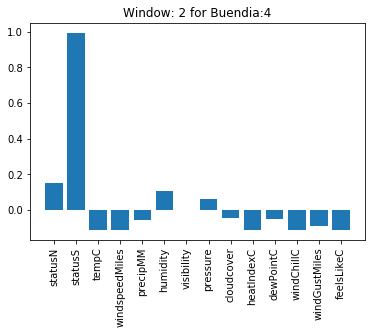

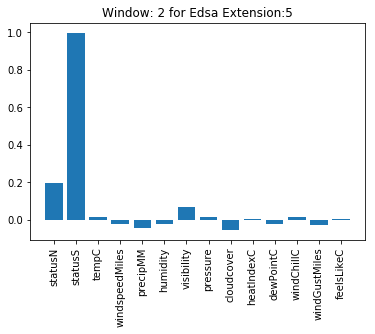

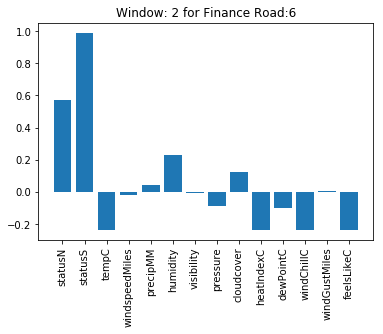

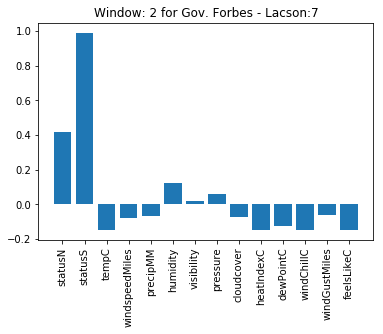

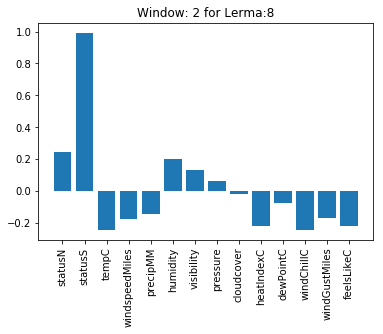

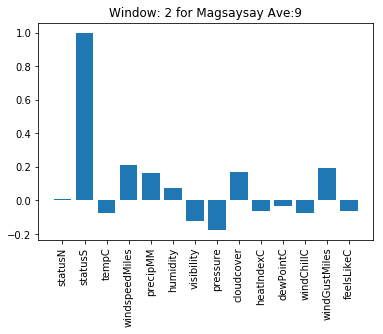

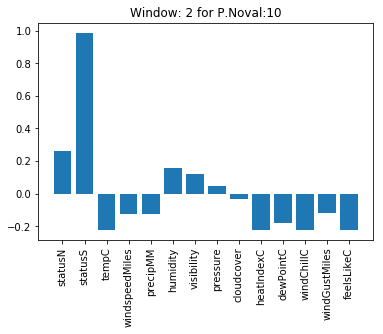

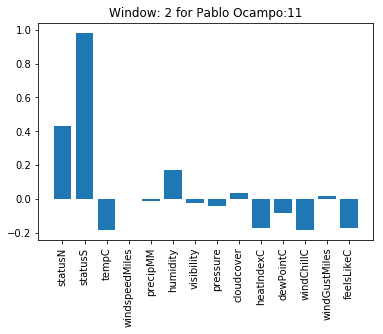

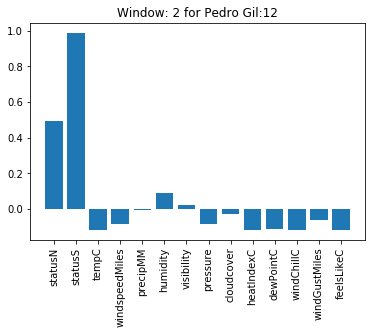

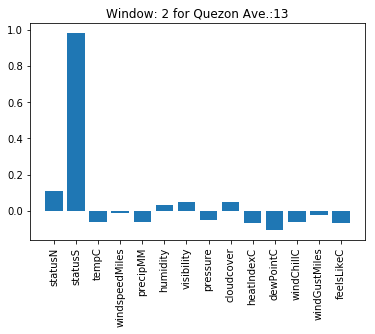

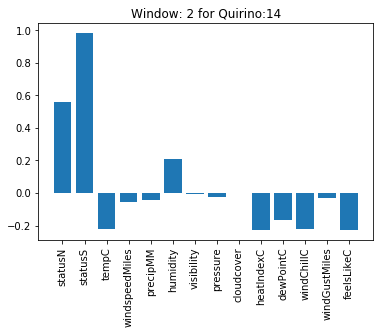

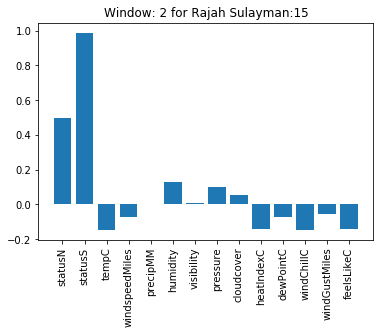

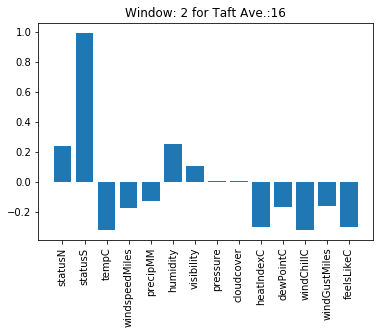

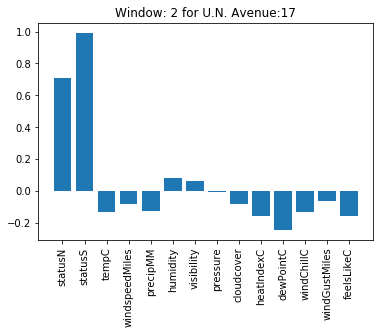

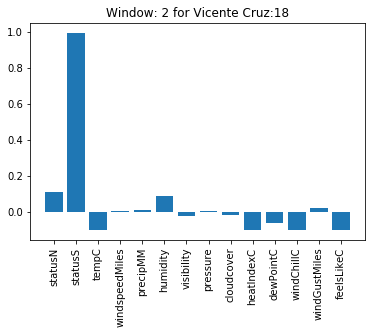

In [17]:
# for W=1
w = 0

for r in range(len(ROADS_1)): 
    y = []
    for f in range(3, len(ROADS_SB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_SB_CR[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.title("Window: " + str(WINDOWS[w]) + " for " + ROADS_1[r] + ":" + str(r))

    plt.show()

#### All Graph = Road r.  One Graph = Window of All Features

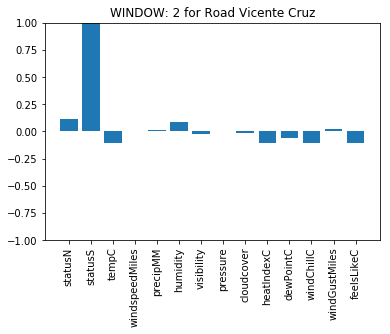

Max for WINDOW 2:0.10349125004335176



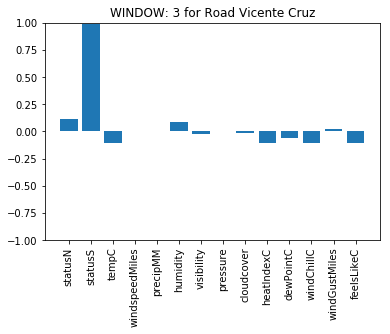

Max for WINDOW 3:0.1036030717966581



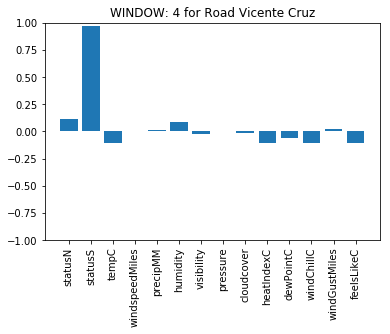

Max for WINDOW 4:0.10469663288587112



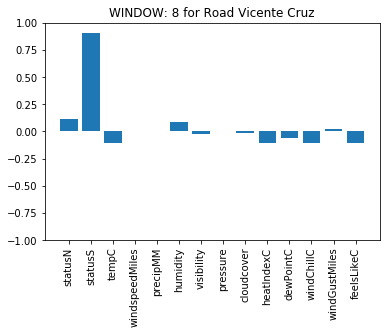

Max for WINDOW 8:0.10578312251586476



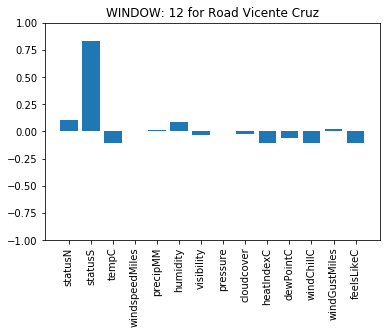

Max for WINDOW 12:0.10572483025848736



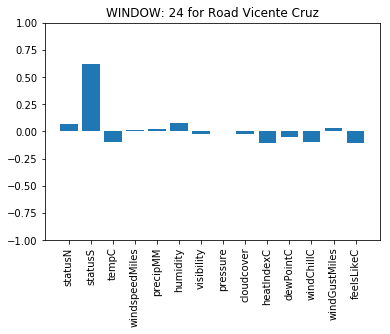

Max for WINDOW 24:0.1039410378210663



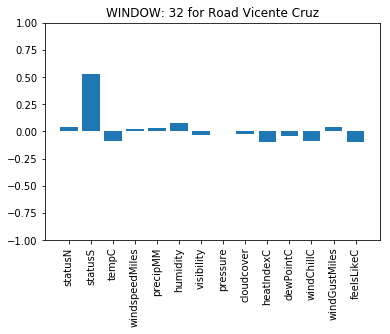

Max for WINDOW 32:0.09834295874438542



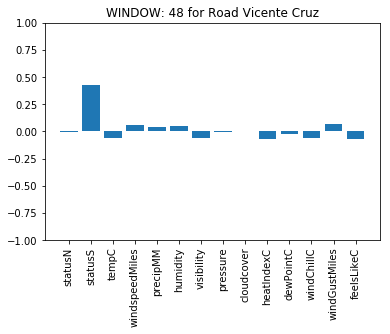

Max for WINDOW 48:0.07320186827096176



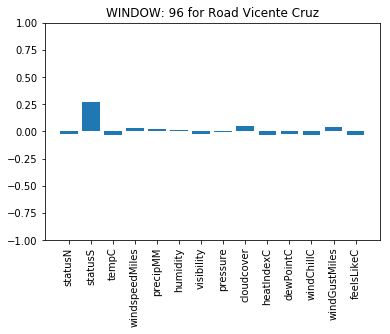

Max for WINDOW 96:0.04727588386649203
Max: 0.10578312251586476
Found in Window: 8


In [18]:
r = 18

maxes = []

fig, ax = plt.subplots()
yGroup = []
fin = False
for w in range(len(WINDOWS)): 
    y = []
    for f in range(3, len(ROADS_SB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_SB_CR[r].iloc[0, f])
    print()
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.ylim(ymin=-1, ymax=1)
    plt.title("WINDOW: " + str(WINDOWS[w]) + " for Road " + ROADS_1[r])    
    plt.show()
        
    print("Max for WINDOW " + str(WINDOWS[w]) + ":" + str(np.absolute(y[2:]).max()))
    maxes.append(np.absolute(y[2:]).max())
    
print("===============")
print("Max: " + str(np.amax(maxes)))
print("Found in Window: " + str(WINDOWS[np.argmax(maxes)]))

#### One Graph = One Feature of All Roads for Window w

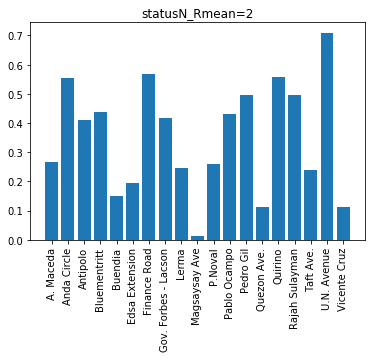

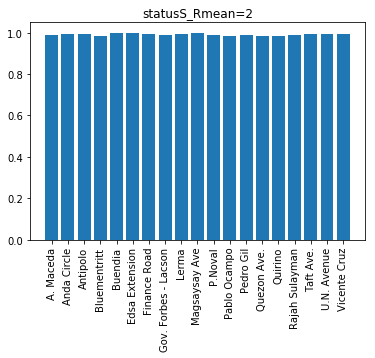

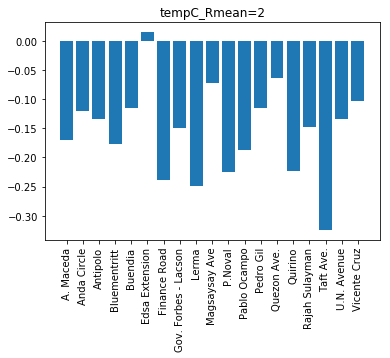

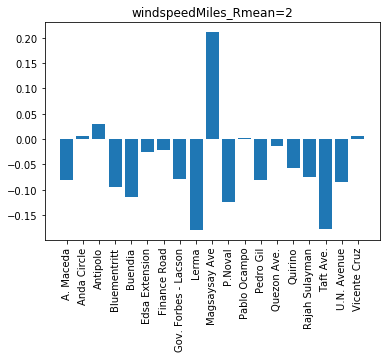

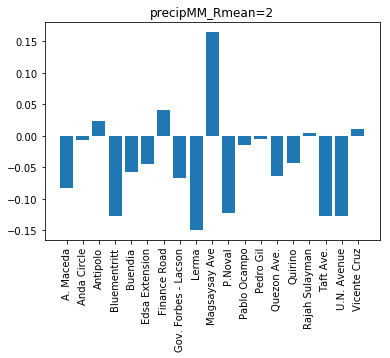

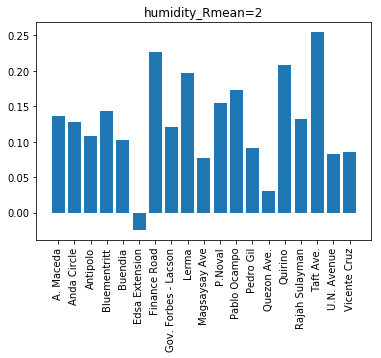

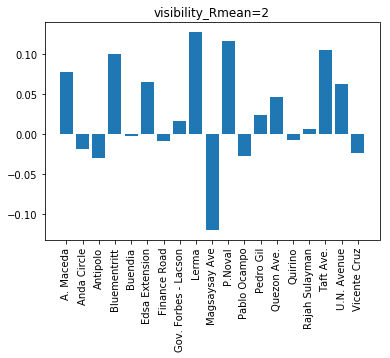

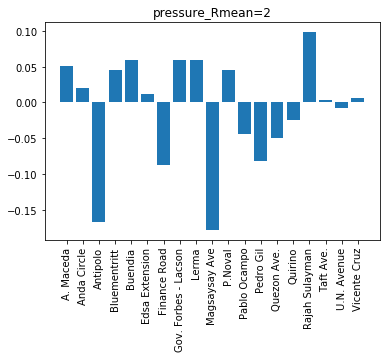

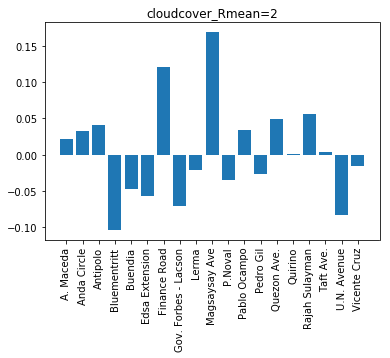

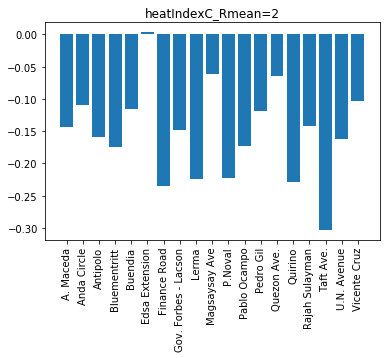

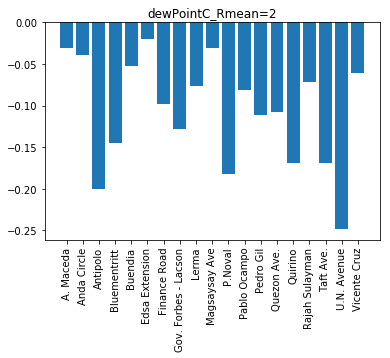

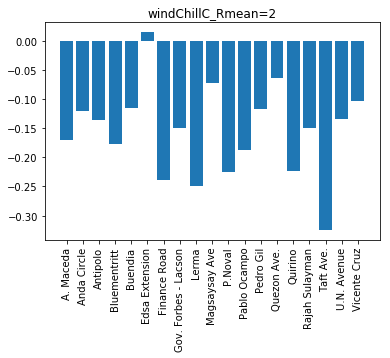

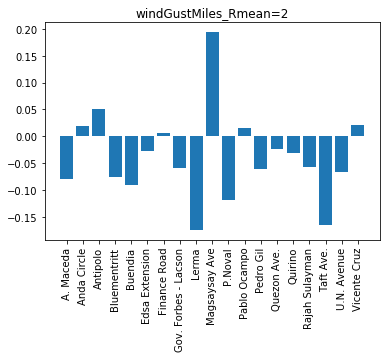

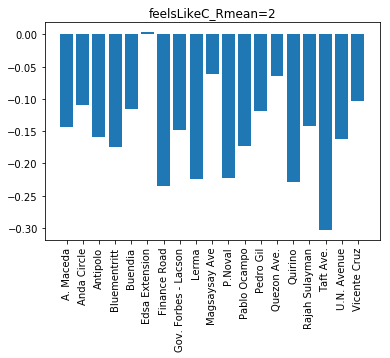

In [19]:
# for W=1
w = 0
r = 0
    
for f in range(3, len(ROADS_SB_CR[0].columns)): 
    y = []
    if f not in rMean[w]:
        continue
    for r in ROADS_SB_CR:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_SB_CR[0].columns[f])
    plt.show()

#### One Graph = One Feature for all Windows of all Roads

precipMM for Road: A. Maceda
precipMM_Rmean=2 : -0.08273657793371658 : 71
precipMM_Rmean=3 : -0.0749756022097876 : 107
precipMM_Rmean=4 : -0.06529857362196026 : 143
precipMM_Rmean=8 : -0.10339088448382533 : 179
precipMM_Rmean=12 : -0.07203856684788802 : 215
precipMM_Rmean=24 : -0.05480254085526252 : 251
precipMM_Rmean=32 : -0.023418727888168168 : 287
precipMM_Rmean=48 : 0.02640256586346297 : 323
precipMM_Rmean=96 : 0.043738884285686834 : 359
Max for Road A. Maceda:0.10339088448382533


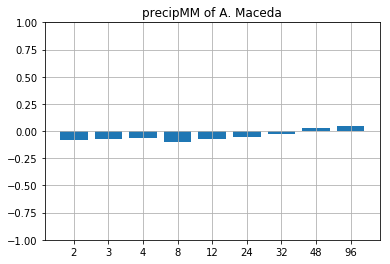

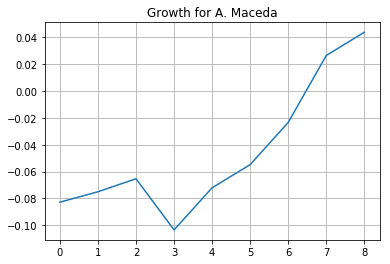

precipMM for Road: Anda Circle
precipMM_Rmean=2 : -0.006510206601383638 : 71
precipMM_Rmean=3 : -0.012923894718917113 : 107
precipMM_Rmean=4 : -0.005416892220811251 : 143
precipMM_Rmean=8 : -0.02214876178349277 : 179
precipMM_Rmean=12 : -0.0041807428704895505 : 215
precipMM_Rmean=24 : -0.006325880747637554 : 251
precipMM_Rmean=32 : -0.0008018371927999933 : 287
precipMM_Rmean=48 : 0.011927412210392304 : 323
precipMM_Rmean=96 : 0.013128085771586612 : 359
Max for Road Anda Circle:0.02214876178349277


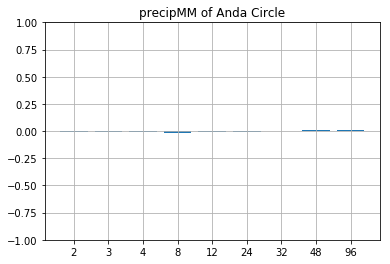

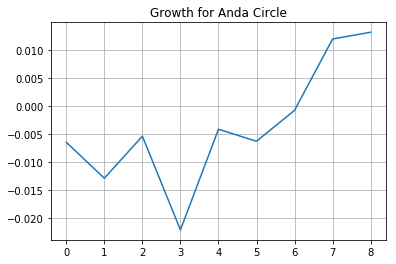

precipMM for Road: Antipolo
precipMM_Rmean=2 : 0.02331608475333126 : 71
precipMM_Rmean=3 : 0.004213336362380038 : 107
precipMM_Rmean=4 : -0.004231870611312253 : 143
precipMM_Rmean=8 : 0.07813337161842586 : 179
precipMM_Rmean=12 : 0.02769586314901987 : 215
precipMM_Rmean=24 : 0.09526952645035412 : 251
precipMM_Rmean=32 : 0.10248882039917767 : 287
precipMM_Rmean=48 : 0.12149193599010358 : 323
precipMM_Rmean=96 : 0.0933352963657895 : 359
Max for Road Antipolo:0.12149193599010358


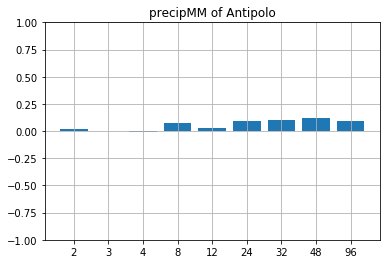

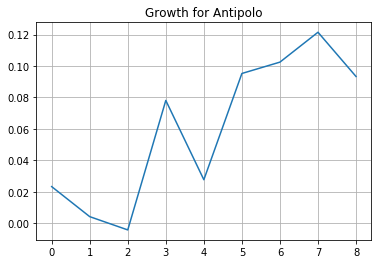

precipMM for Road: Bluementritt
precipMM_Rmean=2 : -0.12784466210998946 : 71
precipMM_Rmean=3 : -0.11677803569403095 : 107
precipMM_Rmean=4 : -0.10299113643147642 : 143
precipMM_Rmean=8 : -0.1265920556495614 : 179
precipMM_Rmean=12 : -0.1045977387532863 : 215
precipMM_Rmean=24 : -0.08104973869395743 : 251
precipMM_Rmean=32 : -0.05511453469762922 : 287
precipMM_Rmean=48 : -0.0185627578829054 : 323
precipMM_Rmean=96 : -0.047832359820742826 : 359
Max for Road Bluementritt:0.12784466210998946


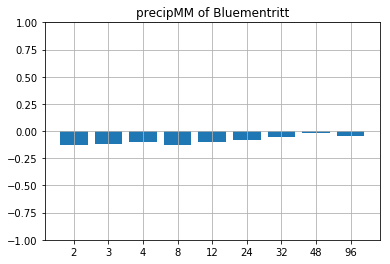

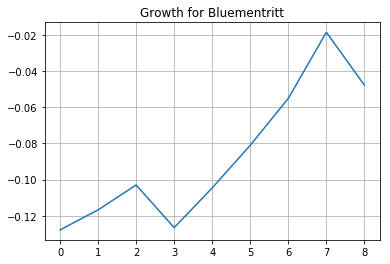

precipMM for Road: Buendia
precipMM_Rmean=2 : -0.057897424622621166 : 71
precipMM_Rmean=3 : -0.05699619040077655 : 107
precipMM_Rmean=4 : -0.04996856535462632 : 143
precipMM_Rmean=8 : -0.046746552325541285 : 179
precipMM_Rmean=12 : -0.039118690167359665 : 215
precipMM_Rmean=24 : -0.01798223859149194 : 251
precipMM_Rmean=32 : -0.0018773479320019523 : 287
precipMM_Rmean=48 : 0.01963794573799541 : 323
precipMM_Rmean=96 : -0.02988604102681035 : 359
Max for Road Buendia:0.057897424622621166


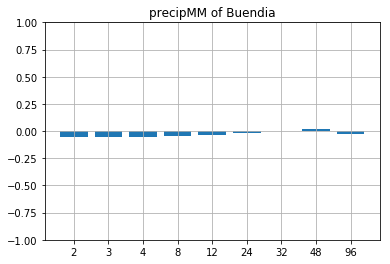

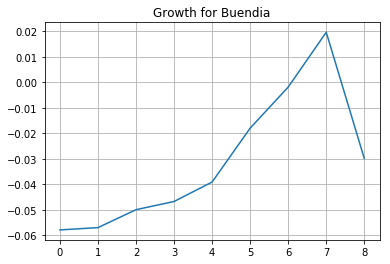

precipMM for Road: Edsa Extension
precipMM_Rmean=2 : -0.04536686916063104 : 71
precipMM_Rmean=3 : -0.044227357551814665 : 107
precipMM_Rmean=4 : -0.04124002159788054 : 143
precipMM_Rmean=8 : -0.04121105581717343 : 179
precipMM_Rmean=12 : -0.04282286958701153 : 215
precipMM_Rmean=24 : -0.05811619384910632 : 251
precipMM_Rmean=32 : -0.07101220955821679 : 287
precipMM_Rmean=48 : -0.0715500884975632 : 323
precipMM_Rmean=96 : -0.08535758385515665 : 359
Max for Road Edsa Extension:0.08535758385515665


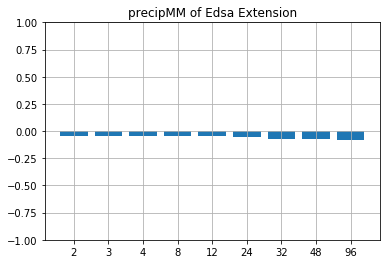

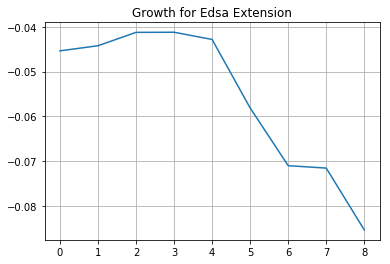

precipMM for Road: Finance Road
precipMM_Rmean=2 : 0.041326898418880605 : 71
precipMM_Rmean=3 : 0.04179092868232074 : 107
precipMM_Rmean=4 : 0.029806079715170856 : 143
precipMM_Rmean=8 : 0.0850073484694433 : 179
precipMM_Rmean=12 : 0.05651816076956793 : 215
precipMM_Rmean=24 : 0.10981043593021897 : 251
precipMM_Rmean=32 : 0.12562440949701015 : 287
precipMM_Rmean=48 : 0.14504797013084622 : 323
precipMM_Rmean=96 : 0.08975975976911088 : 359
Max for Road Finance Road:0.14504797013084622


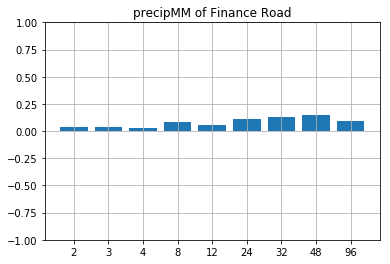

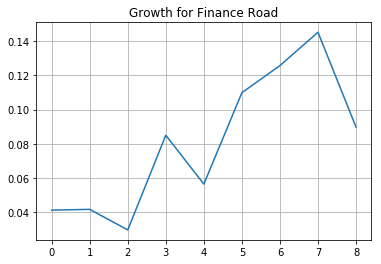

precipMM for Road: Gov. Forbes - Lacson
precipMM_Rmean=2 : -0.0675051932855983 : 71
precipMM_Rmean=3 : -0.05912660206926443 : 107
precipMM_Rmean=4 : -0.05313956479994485 : 143
precipMM_Rmean=8 : -0.07732390659511433 : 179
precipMM_Rmean=12 : -0.054802536088951116 : 215
precipMM_Rmean=24 : -0.047142715625177266 : 251
precipMM_Rmean=32 : -0.028922739424589675 : 287
precipMM_Rmean=48 : -0.007289311575063816 : 323
precipMM_Rmean=96 : -0.036245934617221996 : 359
Max for Road Gov. Forbes - Lacson:0.07732390659511433


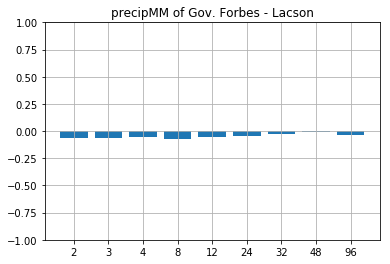

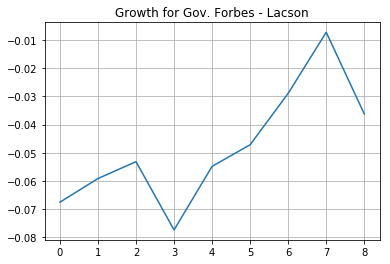

precipMM for Road: Lerma
precipMM_Rmean=2 : -0.14937714973564126 : 71
precipMM_Rmean=3 : -0.14752229218717128 : 107
precipMM_Rmean=4 : -0.14249481888971596 : 143
precipMM_Rmean=8 : -0.1548325944336365 : 179
precipMM_Rmean=12 : -0.14219982322626976 : 215
precipMM_Rmean=24 : -0.09897515991675453 : 251
precipMM_Rmean=32 : -0.05565284048272845 : 287
precipMM_Rmean=48 : 0.01128723503550948 : 323
precipMM_Rmean=96 : 0.007789408377487783 : 359
Max for Road Lerma:0.1548325944336365


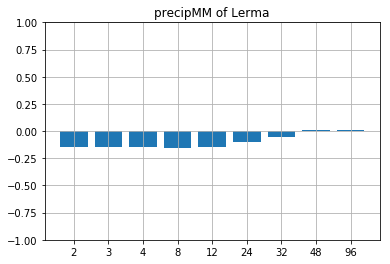

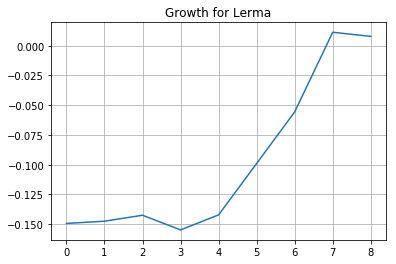

precipMM for Road: Magsaysay Ave
precipMM_Rmean=2 : 0.16416095100660544 : 71
precipMM_Rmean=3 : 0.15379667792443275 : 107
precipMM_Rmean=4 : 0.14455371408396425 : 143
precipMM_Rmean=8 : 0.14302840057541688 : 179
precipMM_Rmean=12 : 0.14854882986219606 : 215
precipMM_Rmean=24 : 0.1617673661503912 : 251
precipMM_Rmean=32 : 0.1588598942053593 : 287
precipMM_Rmean=48 : 0.15194458858767035 : 323
precipMM_Rmean=96 : 0.1310443125785981 : 359
Max for Road Magsaysay Ave:0.16416095100660544


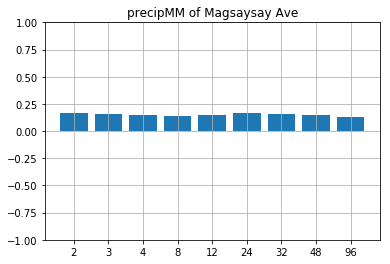

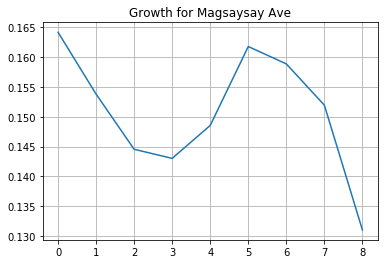

precipMM for Road: P.Noval
precipMM_Rmean=2 : -0.1228767930677721 : 71
precipMM_Rmean=3 : -0.13607614458018227 : 107
precipMM_Rmean=4 : -0.1455016015205275 : 143
precipMM_Rmean=8 : -0.1252624265443848 : 179
precipMM_Rmean=12 : -0.12951229982071513 : 215
precipMM_Rmean=24 : -0.07400484701514062 : 251
precipMM_Rmean=32 : -0.03974688381529548 : 287
precipMM_Rmean=48 : 0.011046163033676792 : 323
precipMM_Rmean=96 : -0.024110990770454626 : 359
Max for Road P.Noval:0.1455016015205275


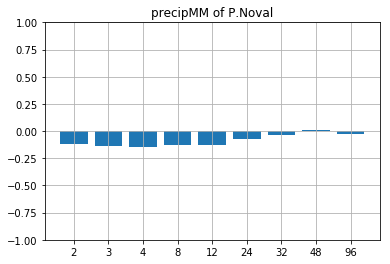

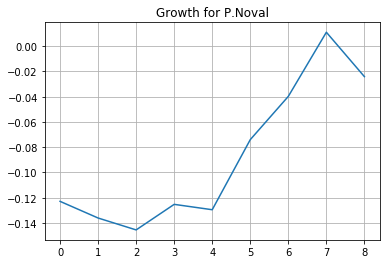

precipMM for Road: Pablo Ocampo
precipMM_Rmean=2 : -0.014837060654439746 : 71
precipMM_Rmean=3 : -0.022612267372122057 : 107
precipMM_Rmean=4 : -0.020217283783106714 : 143
precipMM_Rmean=8 : -0.01786671342996203 : 179
precipMM_Rmean=12 : -0.009386558016053478 : 215
precipMM_Rmean=24 : 0.030296284523971987 : 251
precipMM_Rmean=32 : 0.062331815269266476 : 287
precipMM_Rmean=48 : 0.09505347529255934 : 323
precipMM_Rmean=96 : 0.06421787319498402 : 359
Max for Road Pablo Ocampo:0.09505347529255934


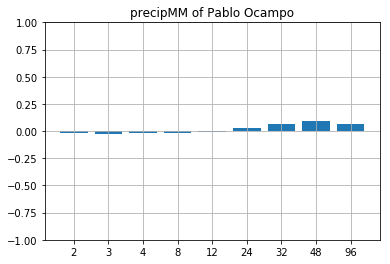

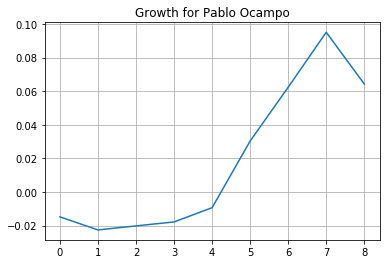

precipMM for Road: Pedro Gil
precipMM_Rmean=2 : -0.005255242220308472 : 71
precipMM_Rmean=3 : -0.014250753376495763 : 107
precipMM_Rmean=4 : -0.034448608116103716 : 143
precipMM_Rmean=8 : 0.03206722068043201 : 179
precipMM_Rmean=12 : -0.009435372304035057 : 215
precipMM_Rmean=24 : 0.06647676409428882 : 251
precipMM_Rmean=32 : 0.07878854998738527 : 287
precipMM_Rmean=48 : 0.114749567180556 : 323
precipMM_Rmean=96 : 0.10740697607015884 : 359
Max for Road Pedro Gil:0.114749567180556


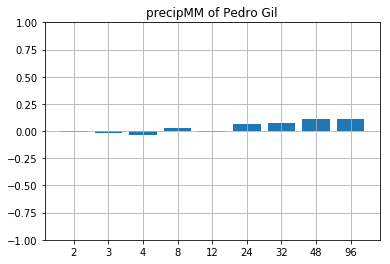

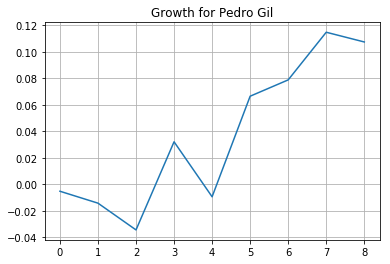

precipMM for Road: Quezon Ave.
precipMM_Rmean=2 : -0.06344252804900749 : 71
precipMM_Rmean=3 : -0.0607578099152758 : 107
precipMM_Rmean=4 : -0.05713394215490599 : 143
precipMM_Rmean=8 : -0.040547680693716164 : 179
precipMM_Rmean=12 : -0.04544635004098434 : 215
precipMM_Rmean=24 : -0.013169858943783969 : 251
precipMM_Rmean=32 : -0.006572475009137289 : 287
precipMM_Rmean=48 : 0.006835508769010752 : 323
precipMM_Rmean=96 : -0.014347464359036994 : 359
Max for Road Quezon Ave.:0.06344252804900749


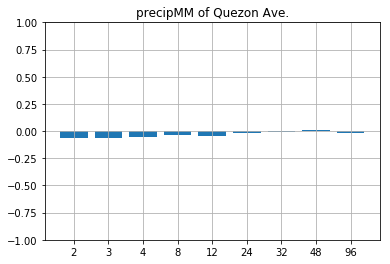

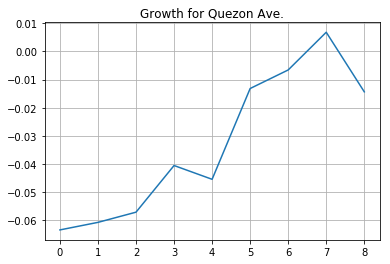

precipMM for Road: Quirino
precipMM_Rmean=2 : -0.04373855544167187 : 71
precipMM_Rmean=3 : -0.04062983646956308 : 107
precipMM_Rmean=4 : -0.03430767053760938 : 143
precipMM_Rmean=8 : -0.02505114383405129 : 179
precipMM_Rmean=12 : -0.02486529044731743 : 215
precipMM_Rmean=24 : 0.024444793645082532 : 251
precipMM_Rmean=32 : 0.044177017759145225 : 287
precipMM_Rmean=48 : 0.055837958902859516 : 323
precipMM_Rmean=96 : 0.0078135894765319 : 359
Max for Road Quirino:0.055837958902859516


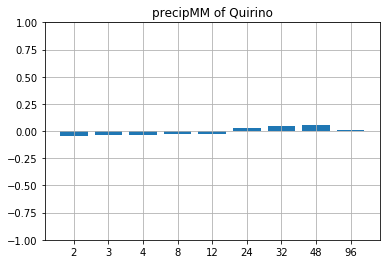

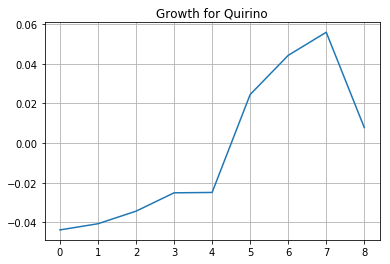

precipMM for Road: Rajah Sulayman
precipMM_Rmean=2 : 0.004889576536866196 : 71
precipMM_Rmean=3 : -0.005676997666145601 : 107
precipMM_Rmean=4 : -0.013171554927629557 : 143
precipMM_Rmean=8 : -0.005812515265007121 : 179
precipMM_Rmean=12 : -0.008612202448280929 : 215
precipMM_Rmean=24 : 0.007327278572995866 : 251
precipMM_Rmean=32 : 0.030786396138166538 : 287
precipMM_Rmean=48 : 0.05618888871673025 : 323
precipMM_Rmean=96 : 0.03930582423330365 : 359
Max for Road Rajah Sulayman:0.05618888871673025


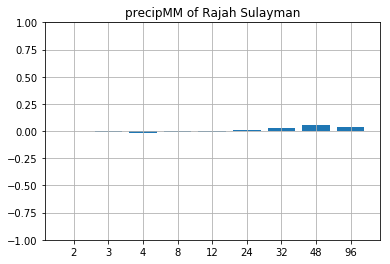

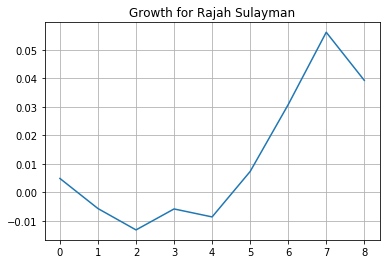

precipMM for Road: Taft Ave.
precipMM_Rmean=2 : -0.12814920571450805 : 71
precipMM_Rmean=3 : -0.12735469562913448 : 107
precipMM_Rmean=4 : -0.11973835014582992 : 143
precipMM_Rmean=8 : -0.12785308775524018 : 179
precipMM_Rmean=12 : -0.1072287247851014 : 215
precipMM_Rmean=24 : -0.053803687078789963 : 251
precipMM_Rmean=32 : -0.0013367127646260015 : 287
precipMM_Rmean=48 : 0.05909651199666996 : 323
precipMM_Rmean=96 : 0.03807873715671509 : 359
Max for Road Taft Ave.:0.12814920571450805


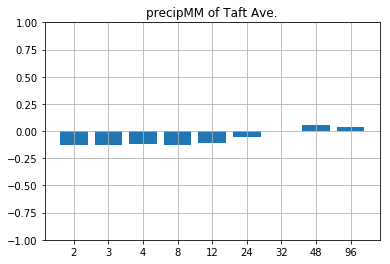

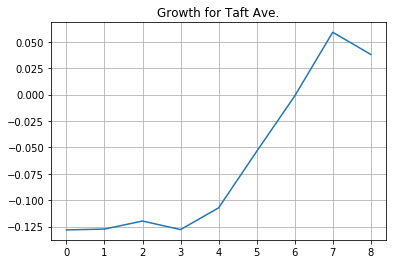

precipMM for Road: U.N. Avenue
precipMM_Rmean=2 : -0.12705056439771165 : 71
precipMM_Rmean=3 : -0.13776375115207548 : 107
precipMM_Rmean=4 : -0.12815601367754725 : 143
precipMM_Rmean=8 : -0.0707844136817245 : 179
precipMM_Rmean=12 : -0.10322510329948674 : 215
precipMM_Rmean=24 : -0.030404445801296545 : 251
precipMM_Rmean=32 : -0.022213865759202332 : 287
precipMM_Rmean=48 : -0.009883581714107477 : 323
precipMM_Rmean=96 : -0.06866946094144845 : 359
Max for Road U.N. Avenue:0.13776375115207548


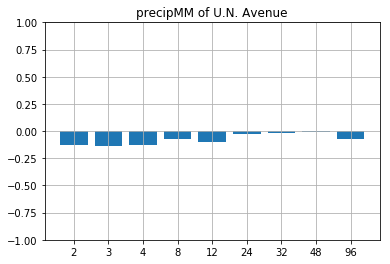

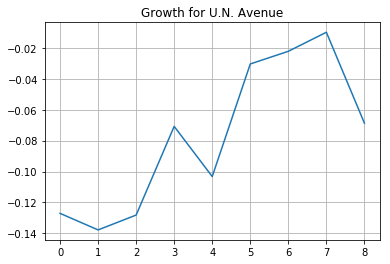

precipMM for Road: Vicente Cruz
precipMM_Rmean=2 : 0.010095738538113855 : 71
precipMM_Rmean=3 : 0.006438398930784392 : 107
precipMM_Rmean=4 : 0.011698266179367943 : 143
precipMM_Rmean=8 : 0.002936694901119191 : 179
precipMM_Rmean=12 : 0.010024026211839688 : 215
precipMM_Rmean=24 : 0.01808305561610806 : 251
precipMM_Rmean=32 : 0.029097687232258432 : 287
precipMM_Rmean=48 : 0.03947333763082817 : 323
precipMM_Rmean=96 : 0.021785549570556083 : 359
Max for Road Vicente Cruz:0.03947333763082817


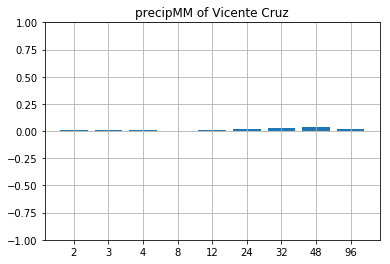

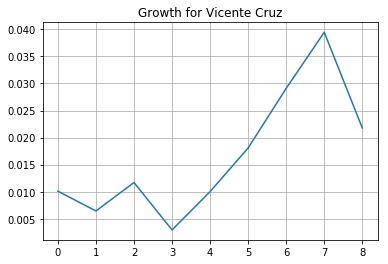

In [20]:
w = 0
r = 0
feature = 'precipMM'
y = []

for r in range(len(ROADS_1)):
    y = []
    print(feature + " for Road: " + ROADS_1[r])
    for w in range(len(WINDOWS)):
        for f in range(3, len(ROADS_SB_CR[r].columns)): 
            if f not in rMean[w]:
                continue
            elif feature not in ROADS_SB_CR[r].columns[f]:
                continue
            print(str(ROADS_SB_CR[r].columns[f]) + " : " + str(ROADS_SB_CR[r].iloc[0, f]) + " : " + str(f))
            y.append(ROADS_SB_CR[r].iloc[0, f])
            
    print("Max for Road " + ROADS_1[r] + ":" + str(np.absolute(y).max()))
    plt.bar(np.arange(len(WINDOWS)), y)
    plt.ylim(ymax=1, ymin=-1)
    plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
    plt.grid()
    plt.title(feature + " of " + ROADS_1[r])
    plt.show()
    
    plt.plot(y)
    plt.grid()
    plt.title("Growth for " + ROADS_1[r])

    plt.show()

<br><br><br>
## ROLLING - NORTHBOUND

In [21]:
rMean = []
for w in WINDOWS:
    rMeanColumns = []
    window = w
    #Figuring out what columns are rolling mean
    for c in range(len(CORR_R[0].columns)):
        col = ROADS_NB_CR[0].columns[c]
        for f in FEATURES:
            if((f+"_Rmean=" + str(window)) == col):
                rMeanColumns.append(c)
    rMean.append(rMeanColumns)

In [22]:
ROADS_NB_CR[0]

,Features,statusN,statusS,statusN_Rmean=2,statusS_Rmean=2,statusN_Rmin=2,statusS_Rmin=2,statusN_Rmax=2,statusS_Rmax=2,statusN_Rmean=3,...,precipMM_Rmax=96,humidity_Rmax=96,visibility_Rmax=96,pressure_Rmax=96,cloudcover_Rmax=96,heatIndexC_Rmax=96,dewPointC_Rmax=96,windChillC_Rmax=96,windGustMiles_Rmax=96,feelsLikeC_Rmax=96
0,statusN,1.0,0.260052,0.987968,0.253089,0.983614,0.247516,0.983668,0.260564,0.964943,...,0.075034,0.036424,-0.066056,-0.123778,0.032845,-0.003539,0.034198,0.011679,0.087781,-0.003539


#### One Graph = All Features of Window w of Road r

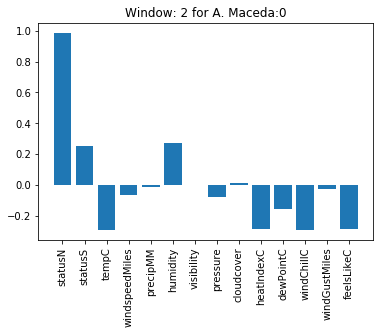

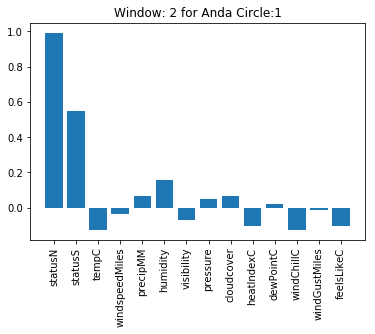

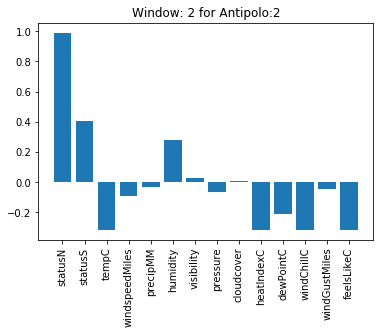

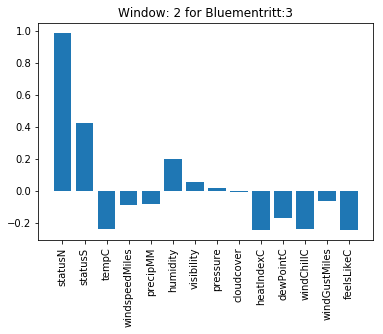

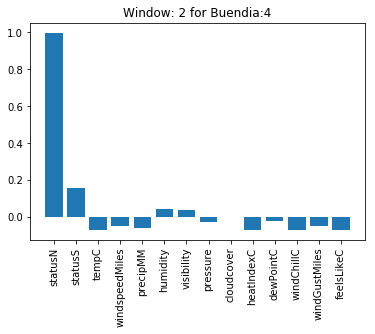

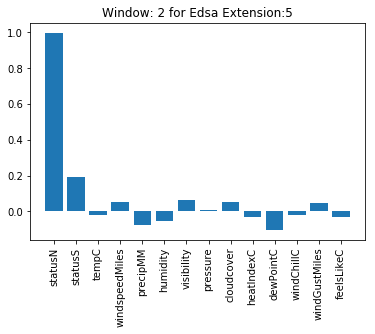

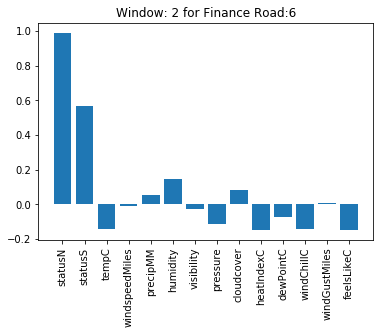

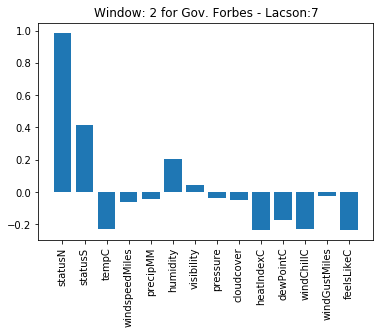

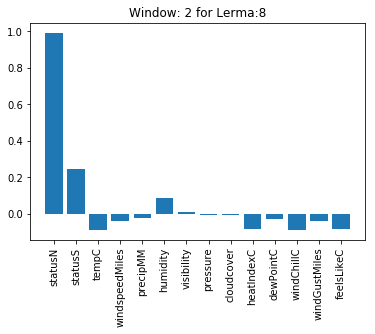

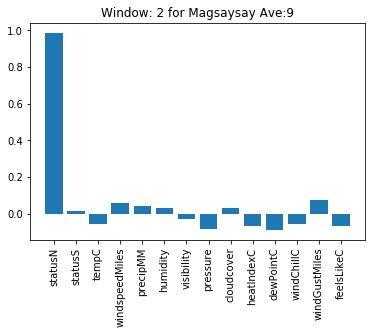

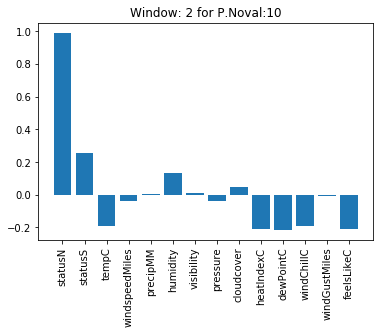

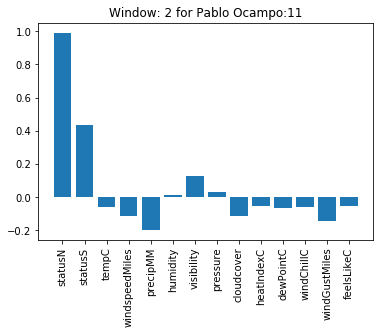

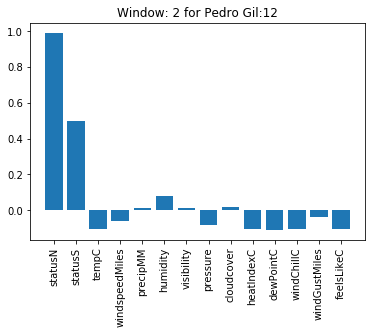

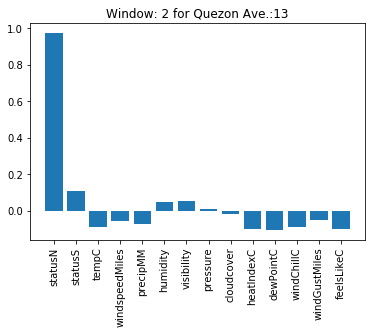

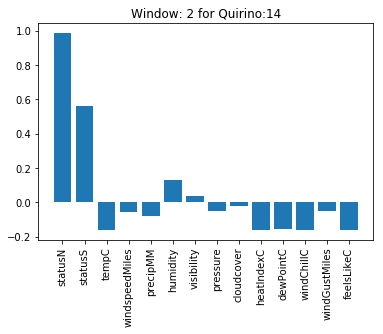

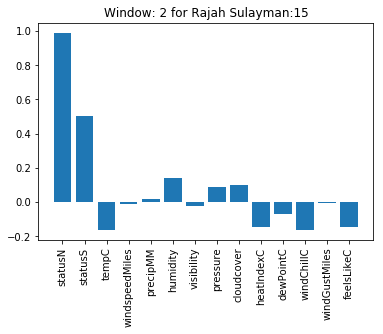

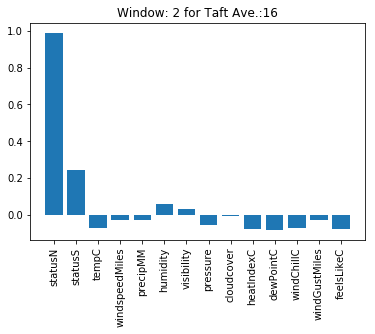

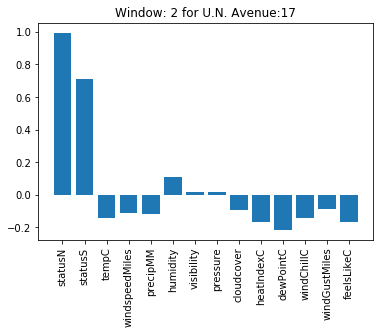

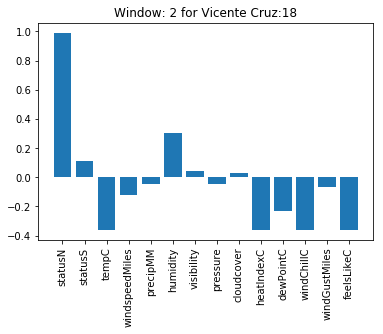

In [23]:
# for W=1
w = 0

for r in range(len(ROADS_1)): 
    y = []
    for f in range(3, len(ROADS_NB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_NB_CR[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.title("Window: " + str(WINDOWS[w]) + " for " + ROADS_1[r] + ":" + str(r))

    plt.show()

#### All Graph = Road r.  One Graph = Window of All Features

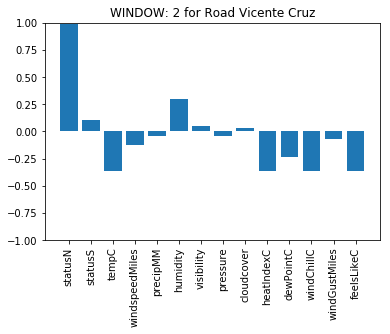

Max for WINDOW 2:0.3635469787345685



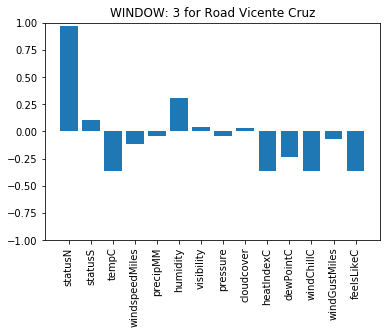

Max for WINDOW 3:0.3677460039506825



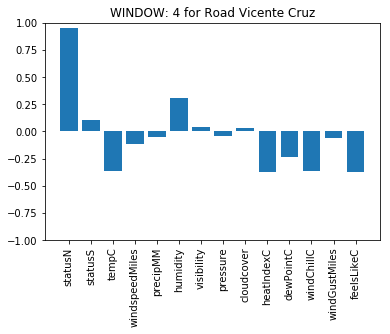

Max for WINDOW 4:0.368832806704849



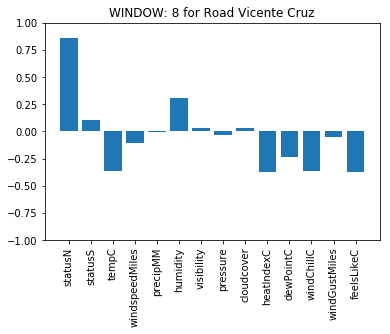

Max for WINDOW 8:0.374614595540624



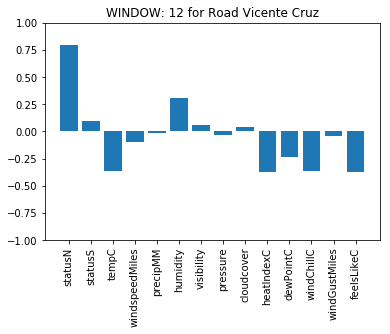

Max for WINDOW 12:0.37435110621963935



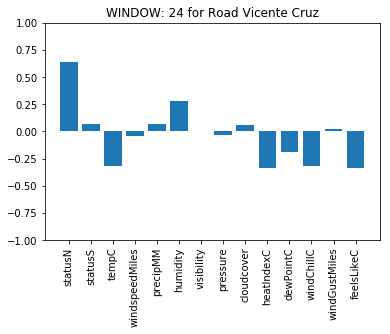

Max for WINDOW 24:0.3363920141304336



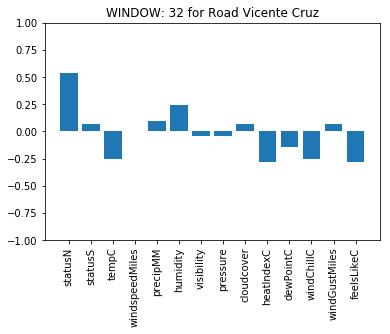

Max for WINDOW 32:0.2813731372247881



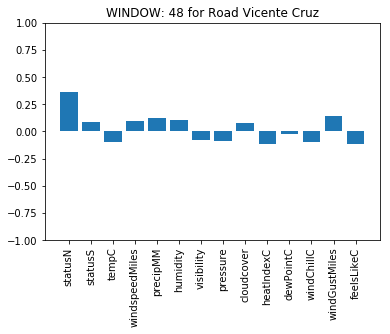

Max for WINDOW 48:0.14293347290110706



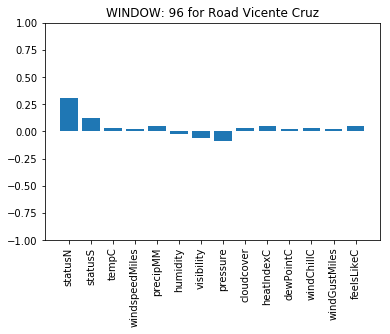

Max for WINDOW 96:0.08424172260248723
Max: 0.374614595540624
Found in Window: 8


In [24]:
r = 18

maxes = []

fig, ax = plt.subplots()
yGroup = []
fin = False
for w in range(len(WINDOWS)): 
    y = []
    for f in range(3, len(ROADS_NB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_NB_CR[r].iloc[0, f])
    print()
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.ylim(ymin=-1, ymax=1)
    plt.title("WINDOW: " + str(WINDOWS[w]) + " for Road " + ROADS_1[r])    
    plt.show()
        
    print("Max for WINDOW " + str(WINDOWS[w]) + ":" + str(np.absolute(y[2:]).max()))
    maxes.append(np.absolute(y[2:]).max())
    
print("===============")
print("Max: " + str(np.amax(maxes)))
print("Found in Window: " + str(WINDOWS[np.argmax(maxes)]))

#### One Graph = One Feature of All Roads for Window w

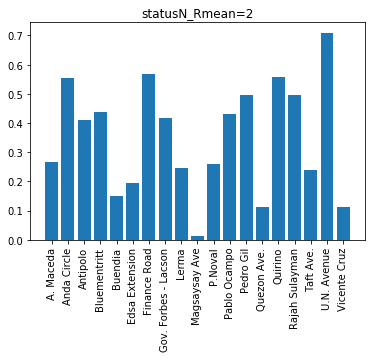

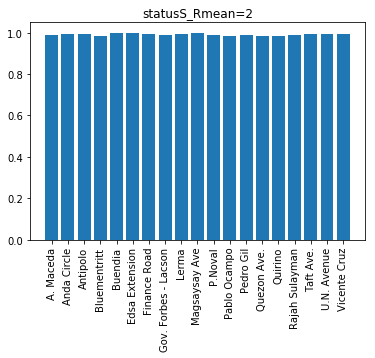

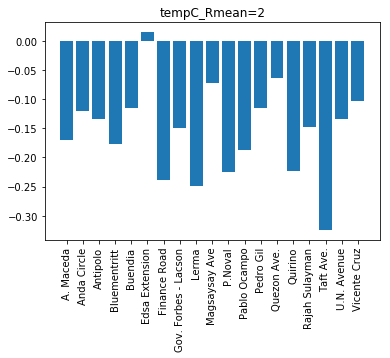

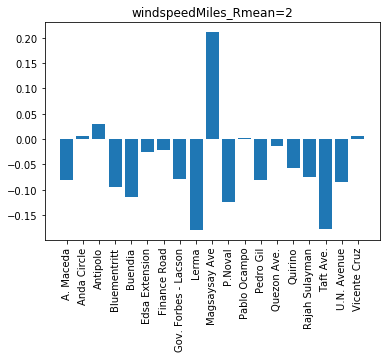

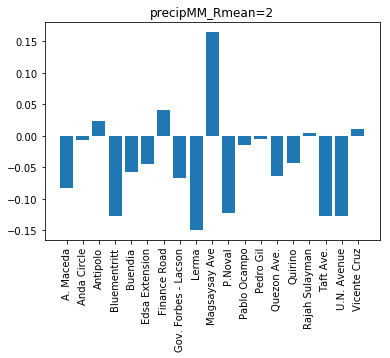

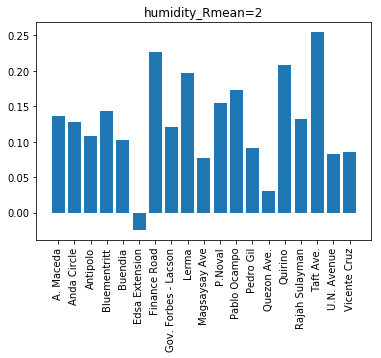

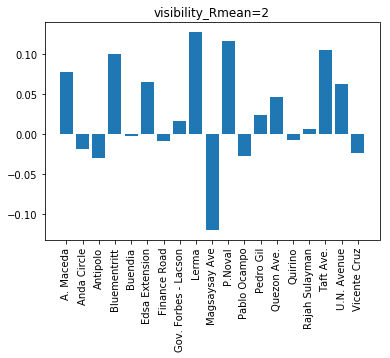

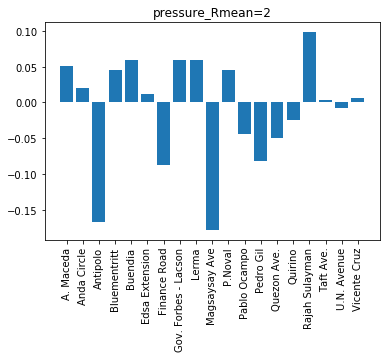

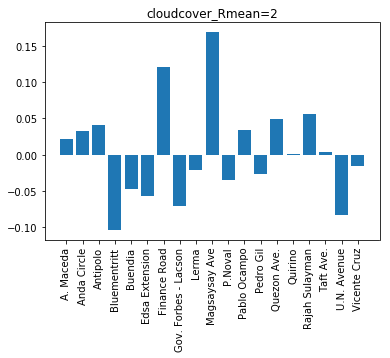

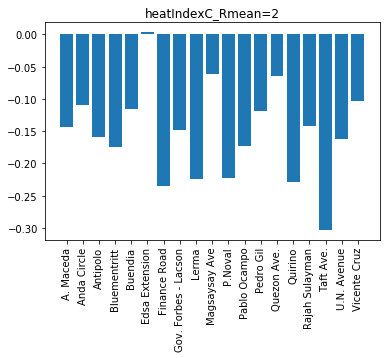

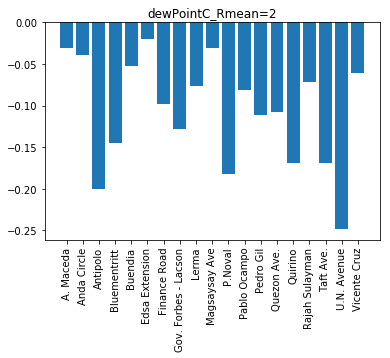

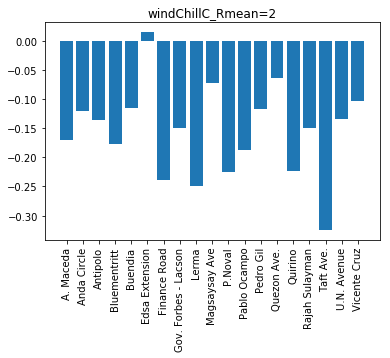

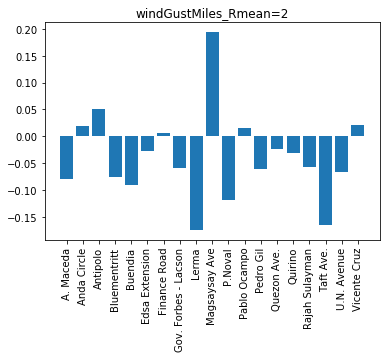

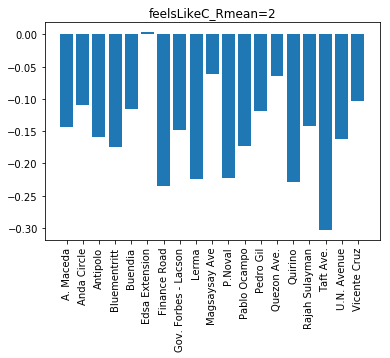

In [25]:
# for W=1
w = 0
r = 0
    
for f in range(3, len(ROADS_NB_CR[0].columns)): 
    y = []
    if f not in rMean[w]:
        continue
    for r in ROADS_SB_CR:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_NB_CR[0].columns[f])
    plt.show()

#### One Graph = One Feature for all Windows of all Roads

precipMM for Road: A. Maceda
precipMM_Rmean=2 : -0.016929324486635883 : 71
precipMM_Rmean=3 : -0.018871225608793174 : 107
precipMM_Rmean=4 : -0.019976080231724855 : 143
precipMM_Rmean=8 : 0.02253999183864749 : 179
precipMM_Rmean=12 : 0.011616760412205916 : 215
precipMM_Rmean=24 : 0.08888257461790164 : 251
precipMM_Rmean=32 : 0.1166884104440189 : 287
precipMM_Rmean=48 : 0.1456815618702488 : 323
precipMM_Rmean=96 : 0.09469763374884378 : 359
Max for Road A. Maceda:0.1456815618702488


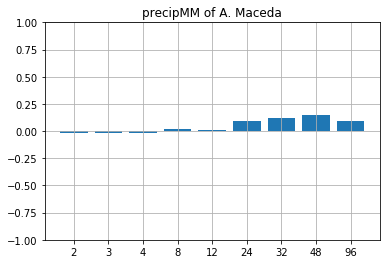

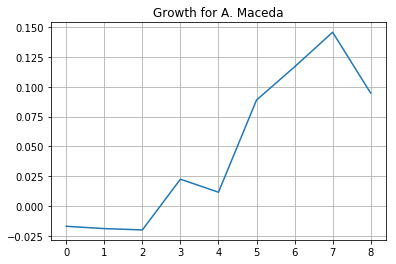

precipMM for Road: Anda Circle
precipMM_Rmean=2 : 0.06660735263699782 : 71
precipMM_Rmean=3 : 0.06252992103023149 : 107
precipMM_Rmean=4 : 0.06713918375258944 : 143
precipMM_Rmean=8 : 0.0319165610513931 : 179
precipMM_Rmean=12 : 0.06266171081332891 : 215
precipMM_Rmean=24 : 0.054536236083996034 : 251
precipMM_Rmean=32 : 0.06514120511864872 : 287
precipMM_Rmean=48 : 0.08225964803968433 : 323
precipMM_Rmean=96 : 0.06949137475073873 : 359
Max for Road Anda Circle:0.08225964803968433


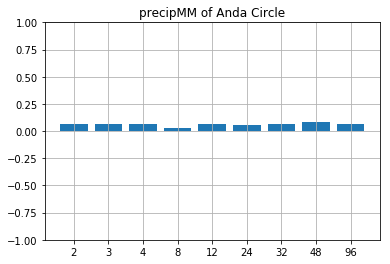

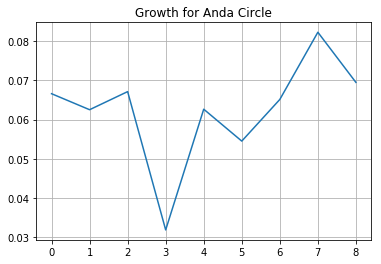

precipMM for Road: Antipolo
precipMM_Rmean=2 : -0.030400339803221224 : 71
precipMM_Rmean=3 : -0.03750277231444972 : 107
precipMM_Rmean=4 : -0.046855044487761816 : 143
precipMM_Rmean=8 : 0.014998332951926516 : 179
precipMM_Rmean=12 : -0.006924389828884278 : 215
precipMM_Rmean=24 : 0.08616344259841181 : 251
precipMM_Rmean=32 : 0.11447741571710135 : 287
precipMM_Rmean=48 : 0.14655969700855725 : 323
precipMM_Rmean=96 : 0.08250561050990249 : 359
Max for Road Antipolo:0.14655969700855725


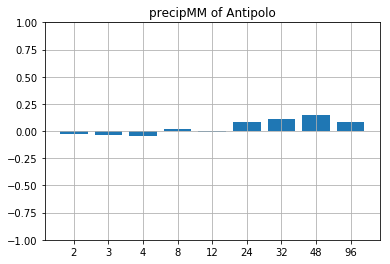

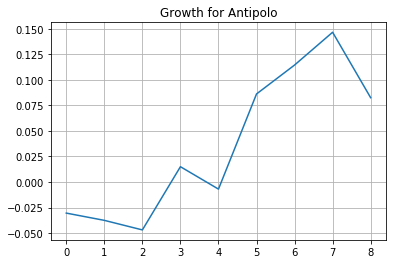

precipMM for Road: Bluementritt
precipMM_Rmean=2 : -0.08275673390206763 : 71
precipMM_Rmean=3 : -0.08074813336499005 : 107
precipMM_Rmean=4 : -0.07147839074717524 : 143
precipMM_Rmean=8 : -0.06059196847882858 : 179
precipMM_Rmean=12 : -0.055731453834875135 : 215
precipMM_Rmean=24 : -0.023732684013361902 : 251
precipMM_Rmean=32 : -0.00238951199347309 : 287
precipMM_Rmean=48 : 0.020276609318852345 : 323
precipMM_Rmean=96 : -0.03405905760802125 : 359
Max for Road Bluementritt:0.08275673390206763


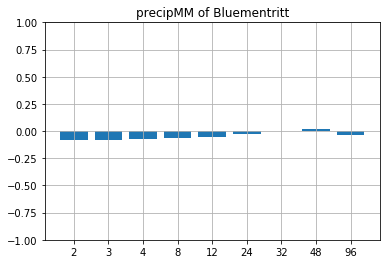

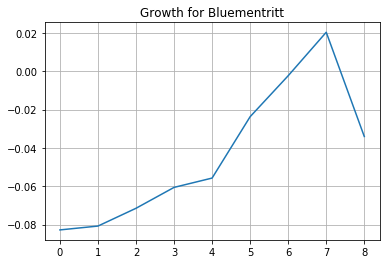

precipMM for Road: Buendia
precipMM_Rmean=2 : -0.06220566048669132 : 71
precipMM_Rmean=3 : -0.062291161675109986 : 107
precipMM_Rmean=4 : -0.05535464933435105 : 143
precipMM_Rmean=8 : -0.06918345560187007 : 179
precipMM_Rmean=12 : -0.05192290482630394 : 215
precipMM_Rmean=24 : -0.04157689840072546 : 251
precipMM_Rmean=32 : -0.02891141270441428 : 287
precipMM_Rmean=48 : -0.016870883379991146 : 323
precipMM_Rmean=96 : -0.06898905707064076 : 359
Max for Road Buendia:0.06918345560187007


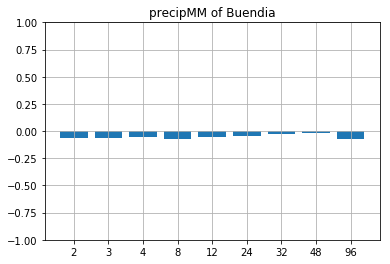

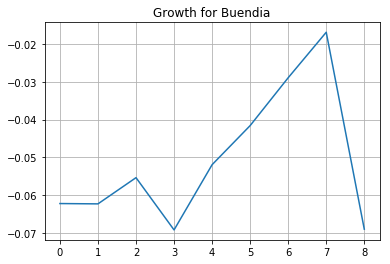

precipMM for Road: Edsa Extension
precipMM_Rmean=2 : -0.07718459661127604 : 71
precipMM_Rmean=3 : -0.08974178491912335 : 107
precipMM_Rmean=4 : -0.0882941785487608 : 143
precipMM_Rmean=8 : -0.09718906644368212 : 179
precipMM_Rmean=12 : -0.09198330467359317 : 215
precipMM_Rmean=24 : -0.10035031954617372 : 251
precipMM_Rmean=32 : -0.10658486667724557 : 287
precipMM_Rmean=48 : -0.12015735661097995 : 323
precipMM_Rmean=96 : -0.11737094532842968 : 359
Max for Road Edsa Extension:0.12015735661097995


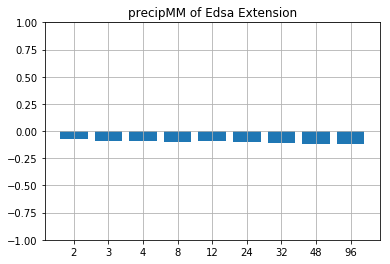

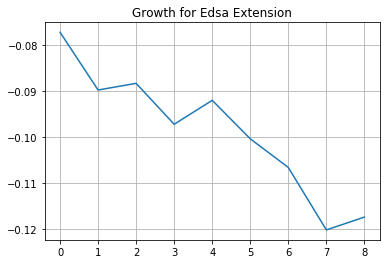

precipMM for Road: Finance Road
precipMM_Rmean=2 : 0.051381548538347824 : 71
precipMM_Rmean=3 : 0.05626833029216823 : 107
precipMM_Rmean=4 : 0.04247258167982605 : 143
precipMM_Rmean=8 : 0.11110352306524628 : 179
precipMM_Rmean=12 : 0.07159359664662009 : 215
precipMM_Rmean=24 : 0.12125775409437388 : 251
precipMM_Rmean=32 : 0.12558298966690454 : 287
precipMM_Rmean=48 : 0.14392262062421932 : 323
precipMM_Rmean=96 : 0.11578478174549882 : 359
Max for Road Finance Road:0.14392262062421932


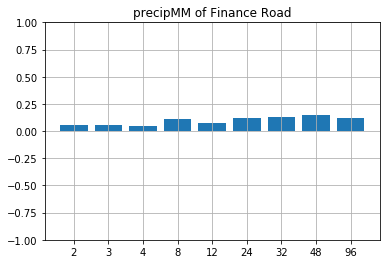

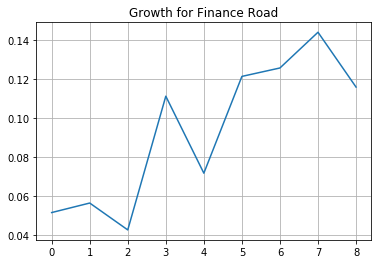

precipMM for Road: Gov. Forbes - Lacson
precipMM_Rmean=2 : -0.04252202617637117 : 71
precipMM_Rmean=3 : -0.04370242034770304 : 107
precipMM_Rmean=4 : -0.04442945249306066 : 143
precipMM_Rmean=8 : -0.04638960410849546 : 179
precipMM_Rmean=12 : -0.03844692829715155 : 215
precipMM_Rmean=24 : -0.002538747362110259 : 251
precipMM_Rmean=32 : 0.017075343111116442 : 287
precipMM_Rmean=48 : 0.039874220961789 : 323
precipMM_Rmean=96 : 0.0005400039907880066 : 359
Max for Road Gov. Forbes - Lacson:0.04638960410849546


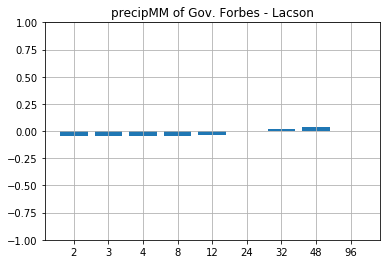

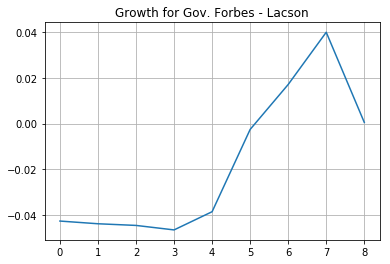

precipMM for Road: Lerma
precipMM_Rmean=2 : -0.022256437760966526 : 71
precipMM_Rmean=3 : -0.01459520196117352 : 107
precipMM_Rmean=4 : -0.011079489078775841 : 143
precipMM_Rmean=8 : -0.003123674193006197 : 179
precipMM_Rmean=12 : -0.003433004959165624 : 215
precipMM_Rmean=24 : 0.021049214627472185 : 251
precipMM_Rmean=32 : 0.03299163428017843 : 287
precipMM_Rmean=48 : 0.057547980323735176 : 323
precipMM_Rmean=96 : 0.034121245893927704 : 359
Max for Road Lerma:0.057547980323735176


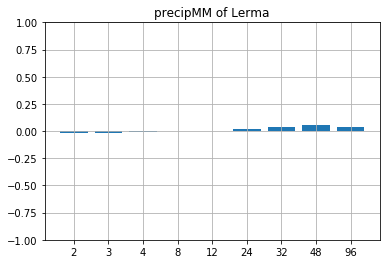

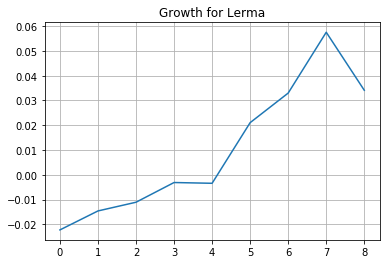

precipMM for Road: Magsaysay Ave
precipMM_Rmean=2 : 0.044477737156348944 : 71
precipMM_Rmean=3 : 0.04606078413690362 : 107
precipMM_Rmean=4 : 0.03997759011268141 : 143
precipMM_Rmean=8 : 0.047725771490101064 : 179
precipMM_Rmean=12 : 0.04256278484481224 : 215
precipMM_Rmean=24 : 0.046585164527841325 : 251
precipMM_Rmean=32 : 0.041777543661225165 : 287
precipMM_Rmean=48 : 0.024978216486067118 : 323
precipMM_Rmean=96 : -0.0018033450187833289 : 359
Max for Road Magsaysay Ave:0.047725771490101064


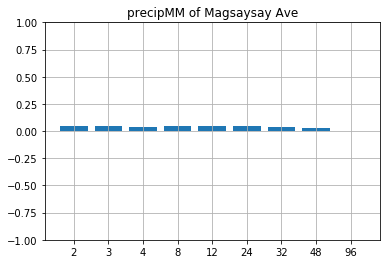

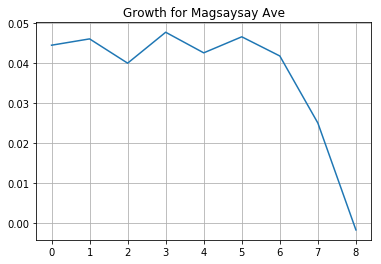

precipMM for Road: P.Noval
precipMM_Rmean=2 : 0.005434746083889959 : 71
precipMM_Rmean=3 : -0.008285781396054803 : 107
precipMM_Rmean=4 : -0.016114589173206344 : 143
precipMM_Rmean=8 : 0.017200929341911163 : 179
precipMM_Rmean=12 : 0.0006349153286446025 : 215
precipMM_Rmean=24 : 0.04953419577401913 : 251
precipMM_Rmean=32 : 0.06775806536534433 : 287
precipMM_Rmean=48 : 0.0922217597079328 : 323
precipMM_Rmean=96 : 0.07279398196008062 : 359
Max for Road P.Noval:0.0922217597079328


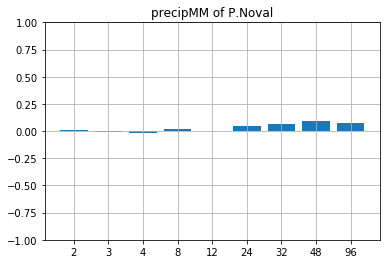

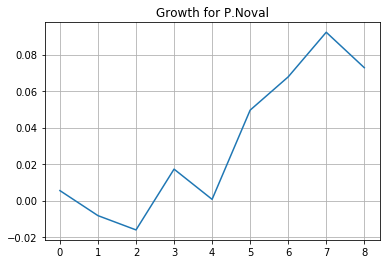

precipMM for Road: Pablo Ocampo
precipMM_Rmean=2 : -0.20045355980979834 : 71
precipMM_Rmean=3 : -0.20349407258309268 : 107
precipMM_Rmean=4 : -0.19716798112719405 : 143
precipMM_Rmean=8 : -0.2079145007931644 : 179
precipMM_Rmean=12 : -0.20185211879046167 : 215
precipMM_Rmean=24 : -0.16840268924401658 : 251
precipMM_Rmean=32 : -0.13122981165654746 : 287
precipMM_Rmean=48 : -0.0797775924588618 : 323
precipMM_Rmean=96 : -0.07552440101526406 : 359
Max for Road Pablo Ocampo:0.2079145007931644


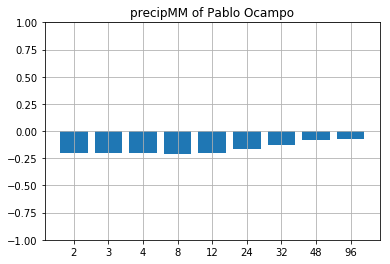

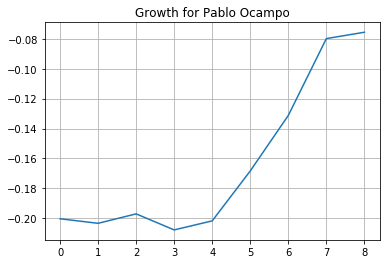

precipMM for Road: Pedro Gil
precipMM_Rmean=2 : 0.011109608767597177 : 71
precipMM_Rmean=3 : 0.00045887874340385217 : 107
precipMM_Rmean=4 : -0.01579552968599306 : 143
precipMM_Rmean=8 : 0.05683888929815315 : 179
precipMM_Rmean=12 : 0.013260120359848993 : 215
precipMM_Rmean=24 : 0.08460529339443795 : 251
precipMM_Rmean=32 : 0.09596257797280712 : 287
precipMM_Rmean=48 : 0.12668053255370526 : 323
precipMM_Rmean=96 : 0.10764499420456164 : 359
Max for Road Pedro Gil:0.12668053255370526


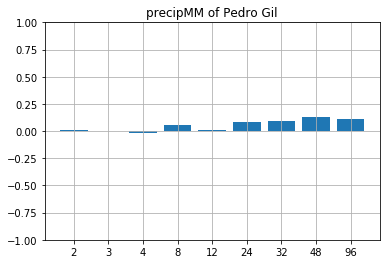

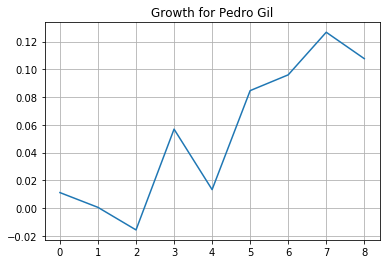

precipMM for Road: Quezon Ave.
precipMM_Rmean=2 : -0.06908201907787341 : 71
precipMM_Rmean=3 : -0.07164146318155154 : 107
precipMM_Rmean=4 : -0.07358851239367788 : 143
precipMM_Rmean=8 : -0.05001414475882368 : 179
precipMM_Rmean=12 : -0.050635233379127766 : 215
precipMM_Rmean=24 : -0.00785963520007792 : 251
precipMM_Rmean=32 : 0.010697607921132644 : 287
precipMM_Rmean=48 : 0.02477165303045032 : 323
precipMM_Rmean=96 : 0.003909379849099086 : 359
Max for Road Quezon Ave.:0.07358851239367788


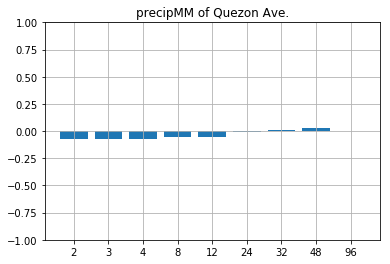

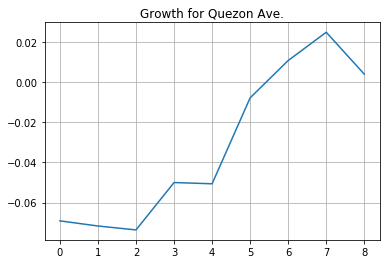

precipMM for Road: Quirino
precipMM_Rmean=2 : -0.07954247760157633 : 71
precipMM_Rmean=3 : -0.0812097565188411 : 107
precipMM_Rmean=4 : -0.0712853203475286 : 143
precipMM_Rmean=8 : -0.057295029888477476 : 179
precipMM_Rmean=12 : -0.06719231222764523 : 215
precipMM_Rmean=24 : -0.028871562241215787 : 251
precipMM_Rmean=32 : -0.01139705409294299 : 287
precipMM_Rmean=48 : 0.014504825551821247 : 323
precipMM_Rmean=96 : -0.007003147886099762 : 359
Max for Road Quirino:0.0812097565188411


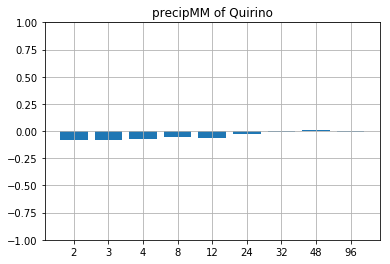

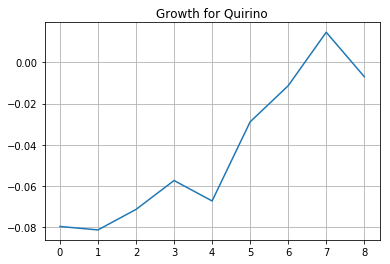

precipMM for Road: Rajah Sulayman
precipMM_Rmean=2 : 0.015295630200990269 : 71
precipMM_Rmean=3 : 0.011243453225979468 : 107
precipMM_Rmean=4 : 0.011653261484760891 : 143
precipMM_Rmean=8 : -0.005705640399214504 : 179
precipMM_Rmean=12 : 0.012833900567293808 : 215
precipMM_Rmean=24 : 0.017495526999367555 : 251
precipMM_Rmean=32 : 0.05266886351564048 : 287
precipMM_Rmean=48 : 0.08900351691632725 : 323
precipMM_Rmean=96 : 0.08850393924515804 : 359
Max for Road Rajah Sulayman:0.08900351691632725


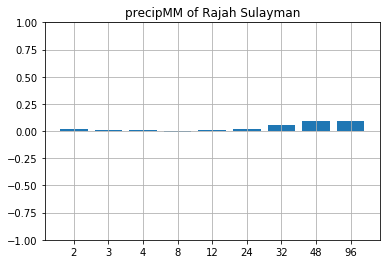

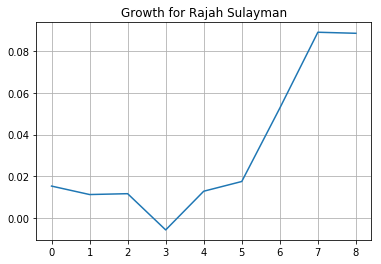

precipMM for Road: Taft Ave.
precipMM_Rmean=2 : -0.02881792449995845 : 71
precipMM_Rmean=3 : -0.034401319992936066 : 107
precipMM_Rmean=4 : -0.04372187467126133 : 143
precipMM_Rmean=8 : -0.019510836465357773 : 179
precipMM_Rmean=12 : -0.0268759958977426 : 215
precipMM_Rmean=24 : 0.002973753738632634 : 251
precipMM_Rmean=32 : 0.013564448072597777 : 287
precipMM_Rmean=48 : 0.028887964520157555 : 323
precipMM_Rmean=96 : 0.007058685596352751 : 359
Max for Road Taft Ave.:0.04372187467126133


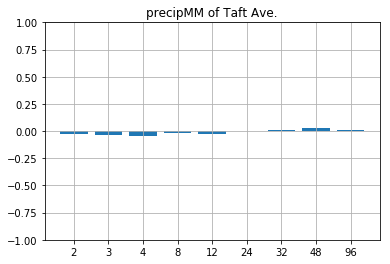

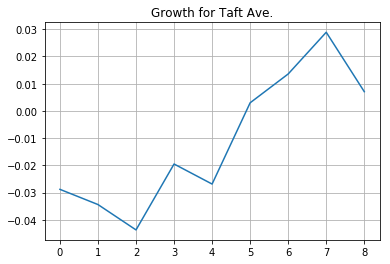

precipMM for Road: U.N. Avenue
precipMM_Rmean=2 : -0.11646126859454307 : 71
precipMM_Rmean=3 : -0.12251102316175087 : 107
precipMM_Rmean=4 : -0.1135171863615215 : 143
precipMM_Rmean=8 : -0.052213601862095116 : 179
precipMM_Rmean=12 : -0.08331732830432849 : 215
precipMM_Rmean=24 : -0.009150224258297528 : 251
precipMM_Rmean=32 : 0.0009747966754955283 : 287
precipMM_Rmean=48 : 0.02301734645585713 : 323
precipMM_Rmean=96 : -0.015948130375433085 : 359
Max for Road U.N. Avenue:0.12251102316175087


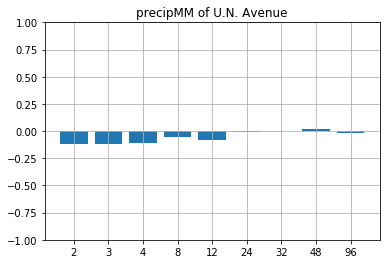

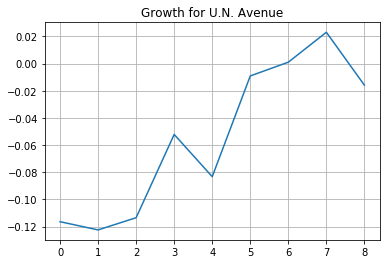

precipMM for Road: Vicente Cruz
precipMM_Rmean=2 : -0.04285033067759842 : 71
precipMM_Rmean=3 : -0.044657290748769035 : 107
precipMM_Rmean=4 : -0.04752828541276735 : 143
precipMM_Rmean=8 : -0.008346264079088875 : 179
precipMM_Rmean=12 : -0.011208719636408584 : 215
precipMM_Rmean=24 : 0.06832373413734627 : 251
precipMM_Rmean=32 : 0.09975931884643202 : 287
precipMM_Rmean=48 : 0.12621773985150733 : 323
precipMM_Rmean=96 : 0.05133954560206597 : 359
Max for Road Vicente Cruz:0.12621773985150733


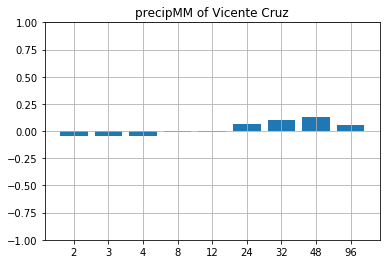

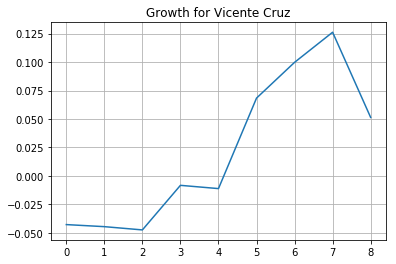

In [26]:
w = 0
r = 0
feature = 'precipMM'
y = []

for r in range(len(ROADS_1)):
    y = []
    print(feature + " for Road: " + ROADS_1[r])
    for w in range(len(WINDOWS)):
        for f in range(3, len(ROADS_NB_CR[r].columns)): 
            if f not in rMean[w]:
                continue
            elif feature not in ROADS_NB_CR[r].columns[f]:
                continue
            print(str(ROADS_NB_CR[r].columns[f]) + " : " + str(ROADS_NB_CR[r].iloc[0, f]) + " : " + str(f))
            y.append(ROADS_NB_CR[r].iloc[0, f])
            
    print("Max for Road " + ROADS_1[r] + ":" + str(np.absolute(y).max()))
    plt.bar(np.arange(len(WINDOWS)), y)
    plt.ylim(ymax=1, ymin=-1)
    plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
    plt.grid()
    plt.title(feature + " of " + ROADS_1[r])
    plt.show()
    
    plt.plot(y)
    plt.grid()
    plt.title("Growth for " + ROADS_1[r])

    plt.show()